# Research Goal: Analysis of every Playground Series Episode.

In [88]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import scipy.stats as st
from scipy.stats import norm
import statistics
import statsmodels.api as sm
import pylab as py

import plotly.express as px

pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [7]:
train_df = pd.read_csv('/content/train.csv', index_col = "id")
test = pd.read_csv('/content/test.csv', index_col = "id")

In [8]:
train_df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
id,,,,,,,,,
0,133.172,59.716,0.043,-0.703,54.917,70.084,0.750,-0.650,0
1,87.094,36.258,0.435,2.266,3.417,21.865,7.039,52.686,0
2,112.641,39.818,0.380,0.922,2.731,15.690,8.193,85.650,0
3,120.680,45.918,-0.098,0.012,2.696,20.955,8.184,70.333,0
4,134.070,57.720,-0.108,-0.573,1.108,11.255,16.108,308.754,0


In [9]:
train_df.shape

(117564, 9)

In [11]:
test.shape

(78377, 8)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117564 entries, 0 to 117563
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_Integrated       117564 non-null  float64
 1   SD                    117564 non-null  float64
 2   EK                    117564 non-null  float64
 3   Skewness              117564 non-null  float64
 4   Mean_DMSNR_Curve      117564 non-null  float64
 5   SD_DMSNR_Curve        117564 non-null  float64
 6   EK_DMSNR_Curve        117564 non-null  float64
 7   Skewness_DMSNR_Curve  117564 non-null  float64
 8   Class                 117564 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 9.0 MB


In [13]:
train_df.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,117564.000,117564.000,117564.000,117564.000,117564.000,117564.000,117564.000,117564.000,117564.000
mean,111.248,46.714,0.503,1.886,11.963,26.191,8.037,93.881,0.093
std,24.906,6.103,1.127,6.515,26.720,20.042,3.841,79.962,0.291
min,6.055,24.783,-1.731,-1.792,0.213,7.370,-2.598,-1.977,0.000
25%,104.547,43.443,0.050,-0.189,2.090,14.955,6.743,49.409,0.000
50%,116.664,47.479,0.186,0.092,2.809,18.165,8.443,83.421,0.000
75%,126.297,50.863,0.396,0.692,4.123,24.732,10.003,122.093,0.000
max,189.367,93.603,7.880,65.386,217.371,109.891,34.540,1191.001,1.000


In [16]:
train_df.isnull().sum().sum()

0

In [18]:
train_df.duplicated().sum()

0

## Hypothesis Testing Function

In [20]:
def hypotesis_testing(data, value, variable):
    frame=data[[variable, value]]
    formula=f'{value} ~ {variable}'
    model=ols(formula, frame).fit()
    print(model.summary(), "\n", "#"*50)

    p_value=np.round(model.f_pvalue, 3)
    print("p_value:", p_value)

    if p_value<0.05:
        print("Reject Null Hypothesis and accept the alternate hypothesis")
    else:
        print("Accept the Null Hypothesis")

## Data Analysis

In [22]:
df_quant = train_df.iloc[:,:-1]
df_qual = train_df[["Class"]]

In [23]:
df_quant.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
id,,,,,,,,
0,133.172,59.716,0.043,-0.703,54.917,70.084,0.750,-0.650
1,87.094,36.258,0.435,2.266,3.417,21.865,7.039,52.686
2,112.641,39.818,0.380,0.922,2.731,15.690,8.193,85.650
3,120.680,45.918,-0.098,0.012,2.696,20.955,8.184,70.333
4,134.070,57.720,-0.108,-0.573,1.108,11.255,16.108,308.754


In [24]:
df_qual.head()

,Class
id,
0,0
1,0
2,0
3,0
4,0


In [30]:
df_quant.nunique()

Mean_Integrated          8175
SD                      47396
EK                      32870
Skewness                35215
Mean_DMSNR_Curve         5701
SD_DMSNR_Curve          38800
EK_DMSNR_Curve          36234
Skewness_DMSNR_Curve    47470
dtype: int64

In [31]:
df_qual.nunique()

Class    2
dtype: int64

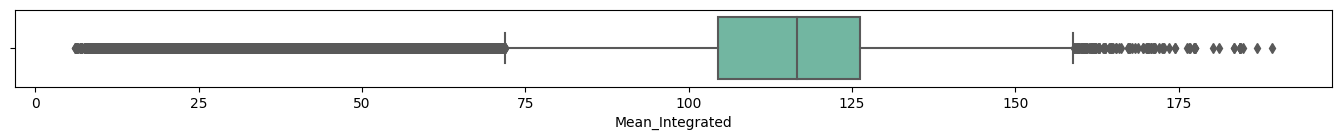

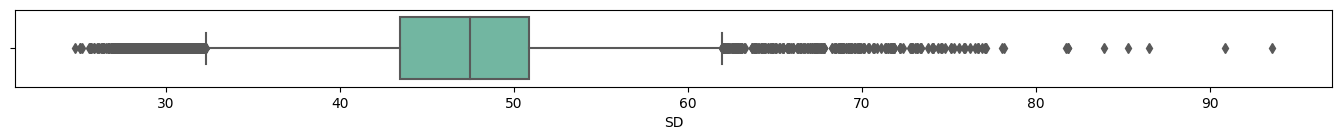

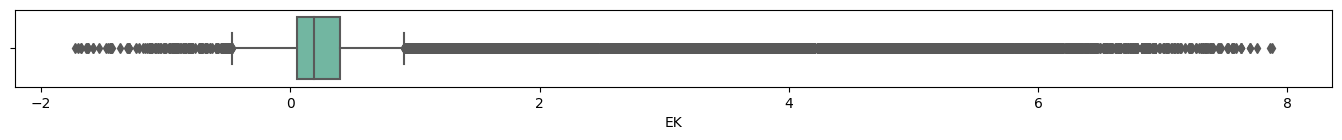

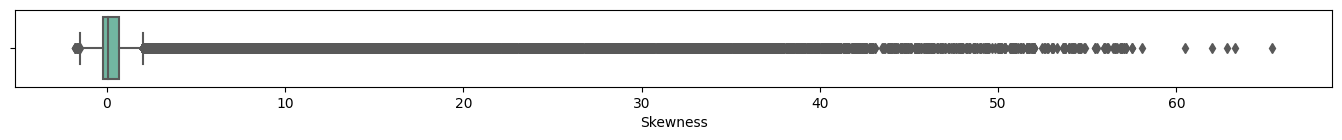

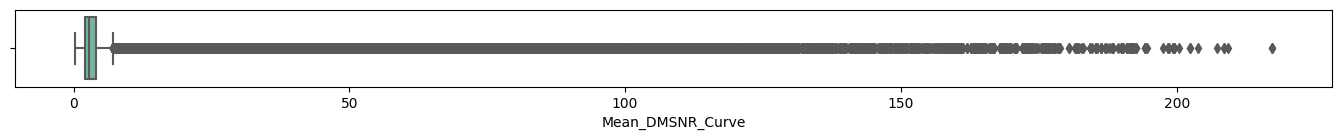

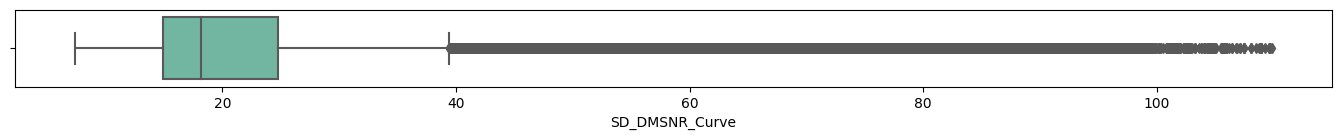

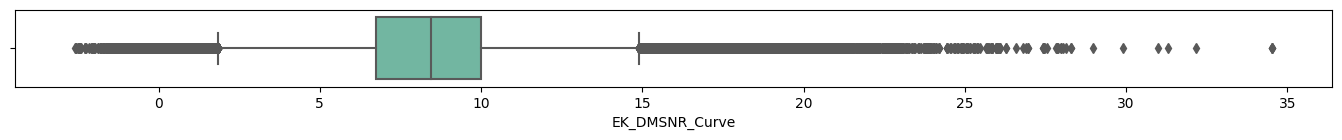

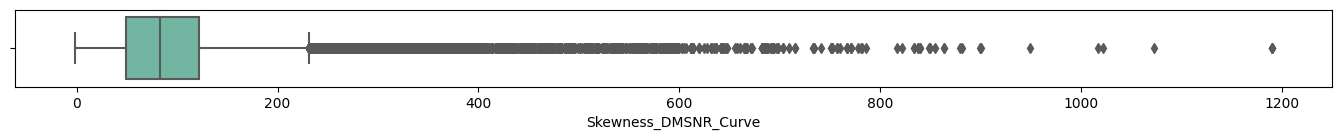

In [26]:
for column in df_quant.columns:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=train_df, orient="h", palette="Set2", x=column)

In [27]:
for col in df_quant.columns:
  q1 = df_quant[col].quantile(0.25)
  q3 = df_quant[col].quantile(0.75)
  iqr = q3 - q1
  whisker_width = 1.5
  lower_whisker = q1 - (whisker_width * iqr)
  upper_whisker = q3 + whisker_width * iqr
  df_quant[col] = np.where(df_quant[col] > upper_whisker, upper_whisker, np.where(df_quant[col] < lower_whisker, lower_whisker, df_quant[col]))

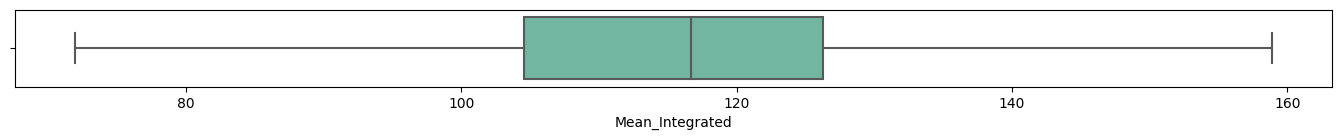

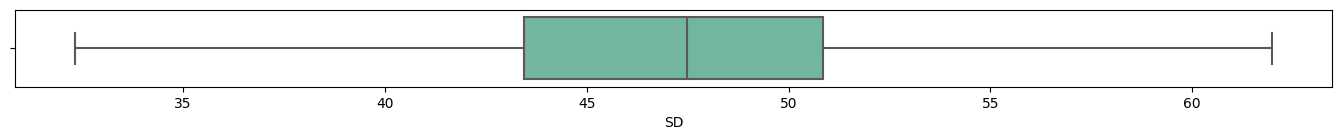

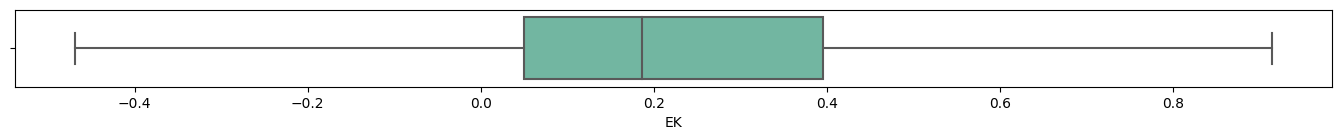

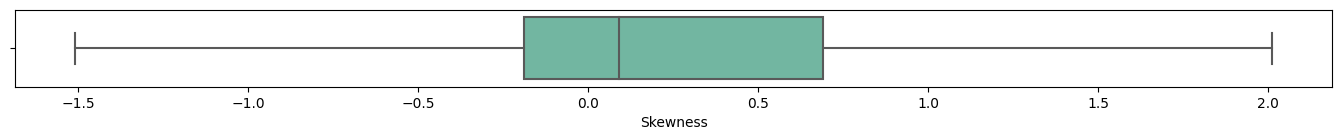

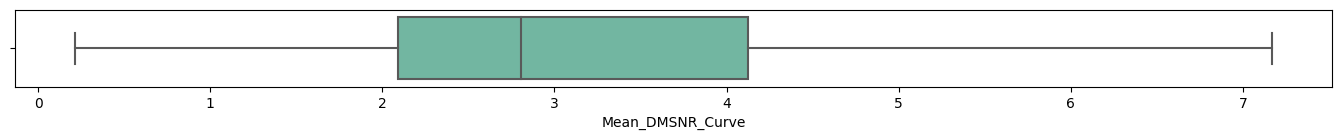

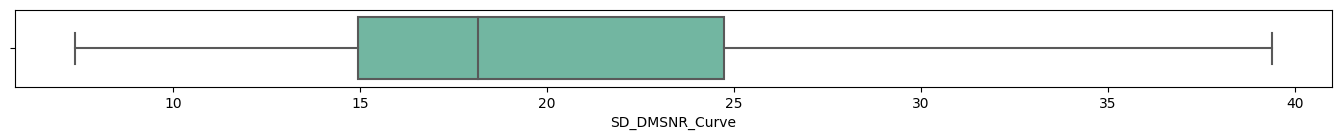

In [28]:
for column in df_quant.iloc[:,:-2].columns:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_quant, orient="h", palette="Set2", x=column)

## Data Visualization

#### Custom Palette for Visualization

In [33]:
train_df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
id,,,,,,,,,
0,133.172,59.716,0.043,-0.703,54.917,70.084,0.750,-0.650,0
1,87.094,36.258,0.435,2.266,3.417,21.865,7.039,52.686,0
2,112.641,39.818,0.380,0.922,2.731,15.690,8.193,85.650,0
3,120.680,45.918,-0.098,0.012,2.696,20.955,8.184,70.333,0
4,134.070,57.720,-0.108,-0.573,1.108,11.255,16.108,308.754,0


In [32]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#f2d4b1","figure.facecolor":"#f2d4b1","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

palette = ["#c94727","#ea5b17","#e57716","#f2a324","#a2c0a6","#7ac0a8","#5e9786","#557260"]

# sns.palplot(sns.color_palette(palette))
# plt.show()

Let's have a look on the Classes :


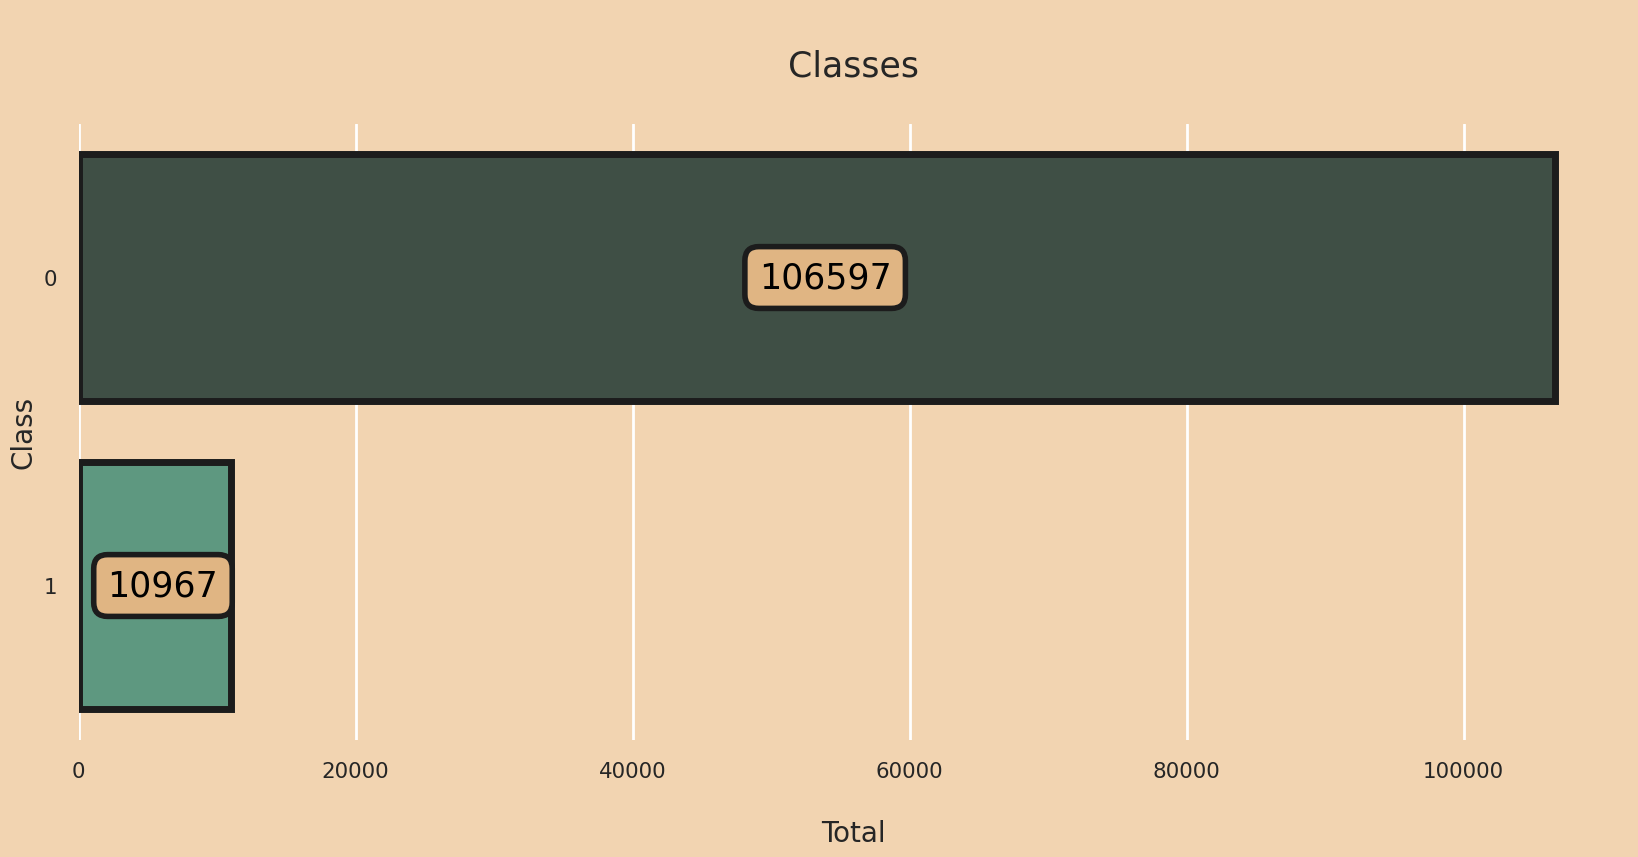

In [60]:
print("Let's have a look on the Classes :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=df_qual["Class"],order=df_qual["Class"].value_counts().index,palette=["#3f4f45","#5e9880"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nClasses\n",fontsize=25)
p.axes.set_ylabel("Class",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the distribution of Mean Integrated :


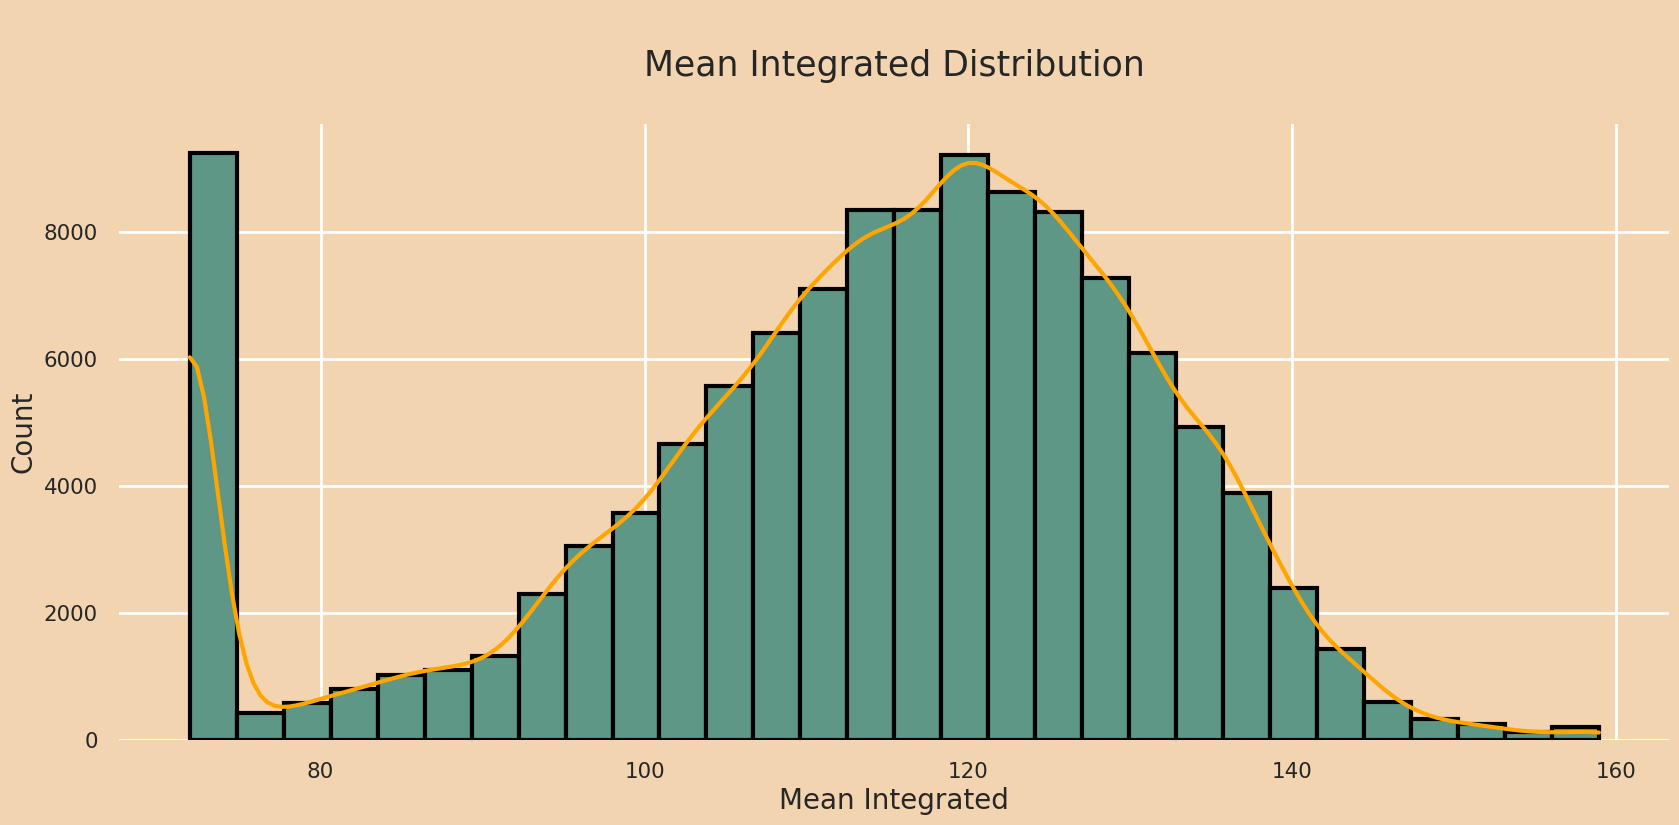

In [36]:
print(f"Let's have a look on the distribution of Mean Integrated :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(df_quant["Mean_Integrated"],color=palette[6],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nMean Integrated Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Mean Integrated",fontsize=20)
plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the distribution of SD:


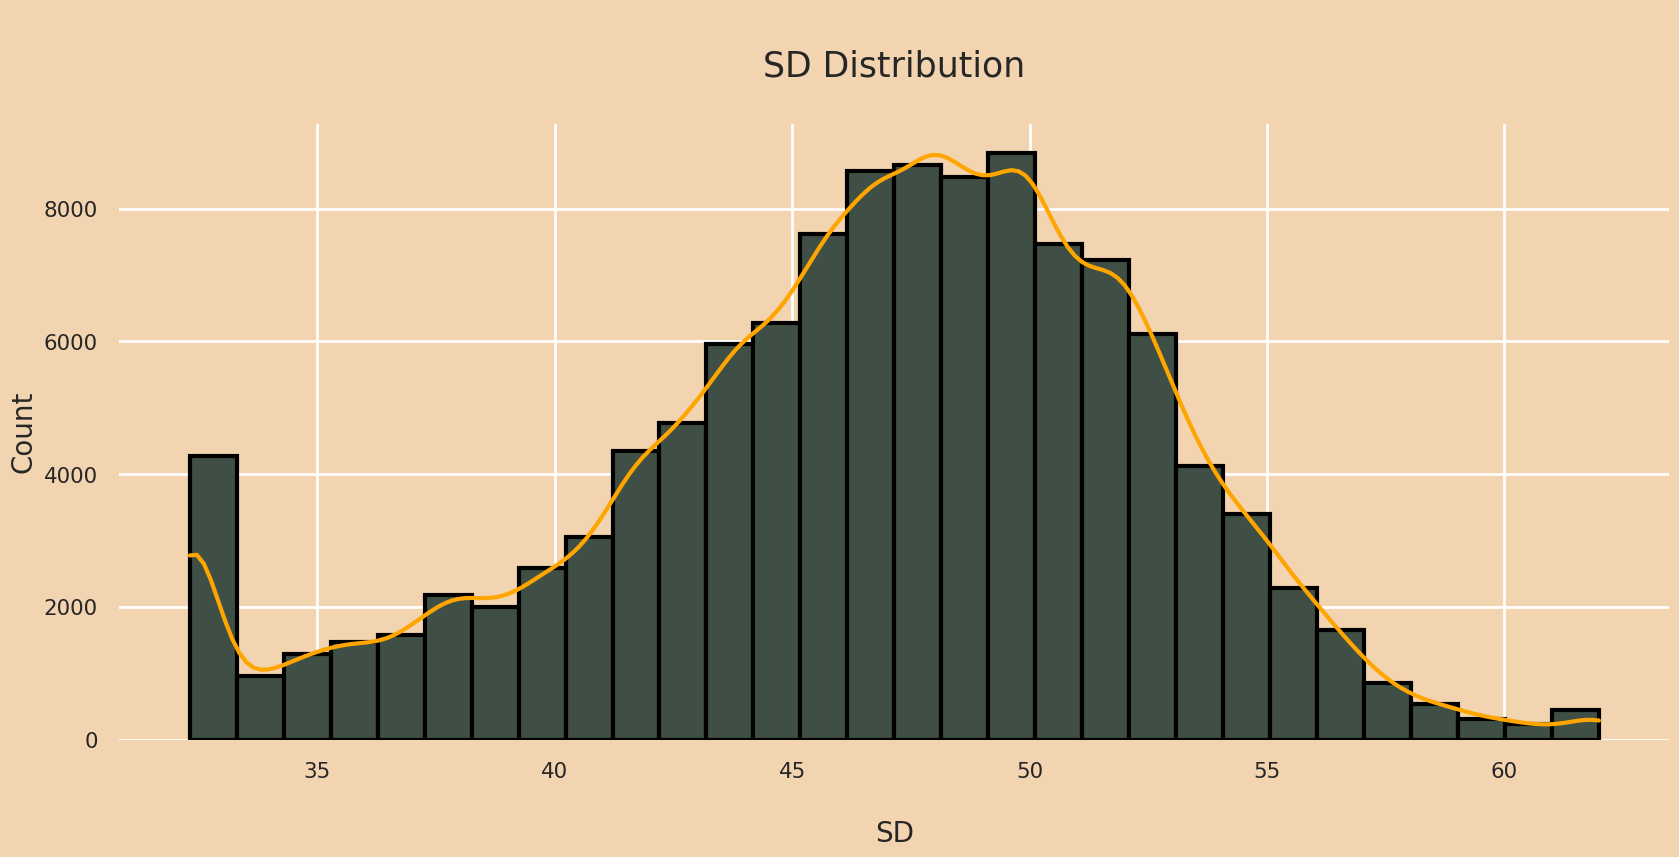

In [67]:
print(f"Let's have a look on the distribution of SD:")
plt.subplots(figsize=(20, 8))
p = sns.histplot(df_quant["SD"],color="#3f4f45",kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nSD Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nSD",fontsize=20)
# plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the distribution of Skewness :


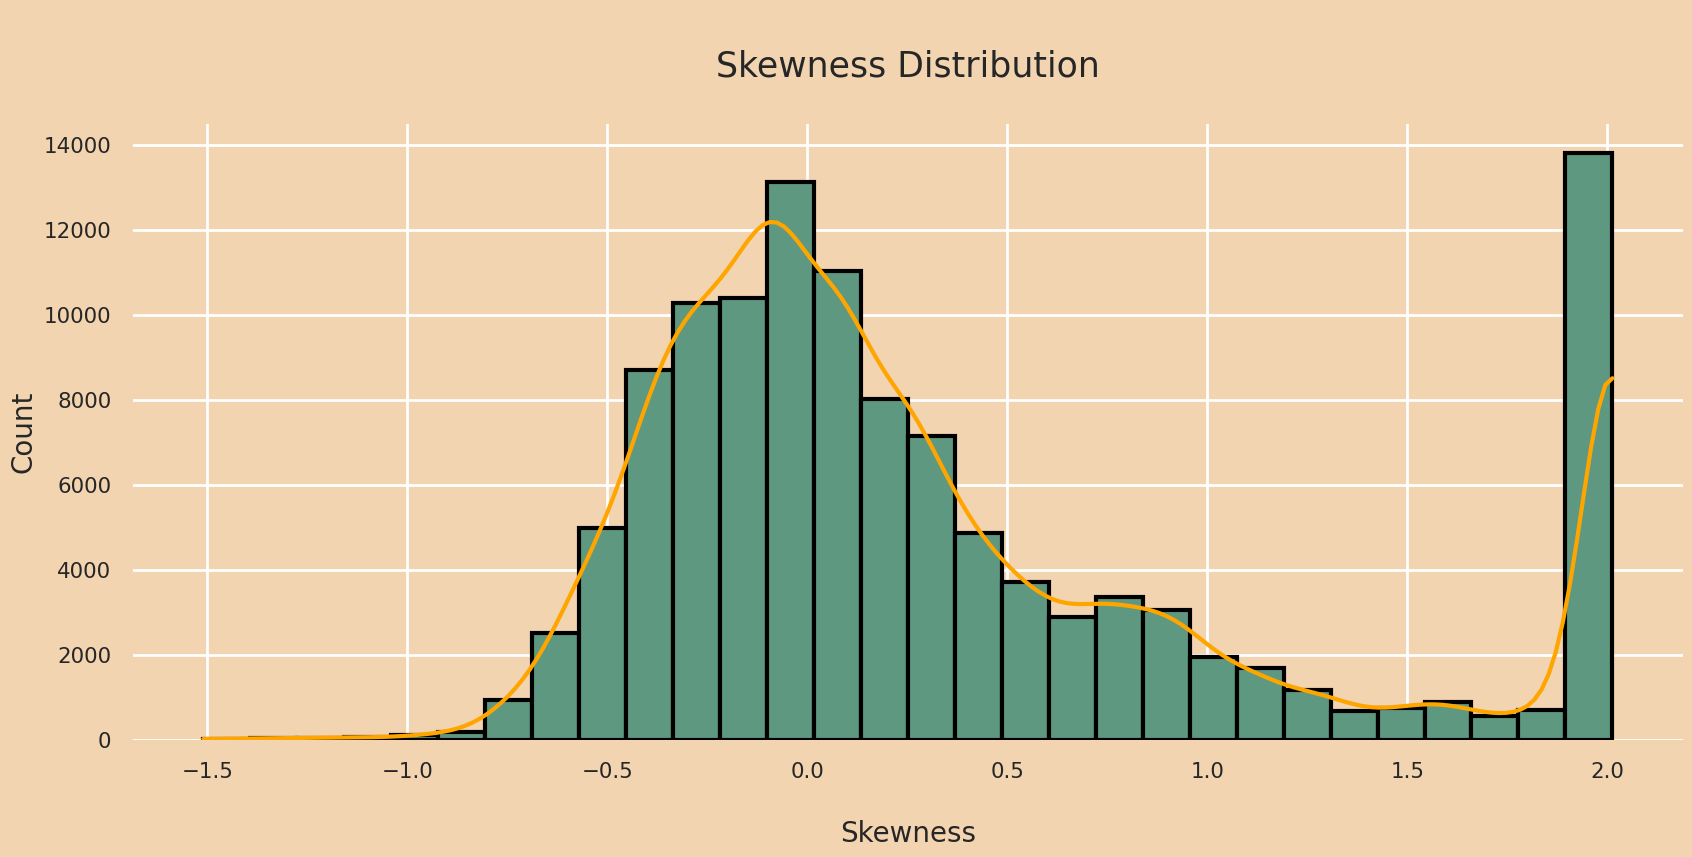

In [72]:
print(f"Let's have a look on the distribution of Skewness :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(df_quant["Skewness"],color="#5e9880",kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nSkewness Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nSkewness",fontsize=20)
# plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the distribution of Mean DMSNR Curve :


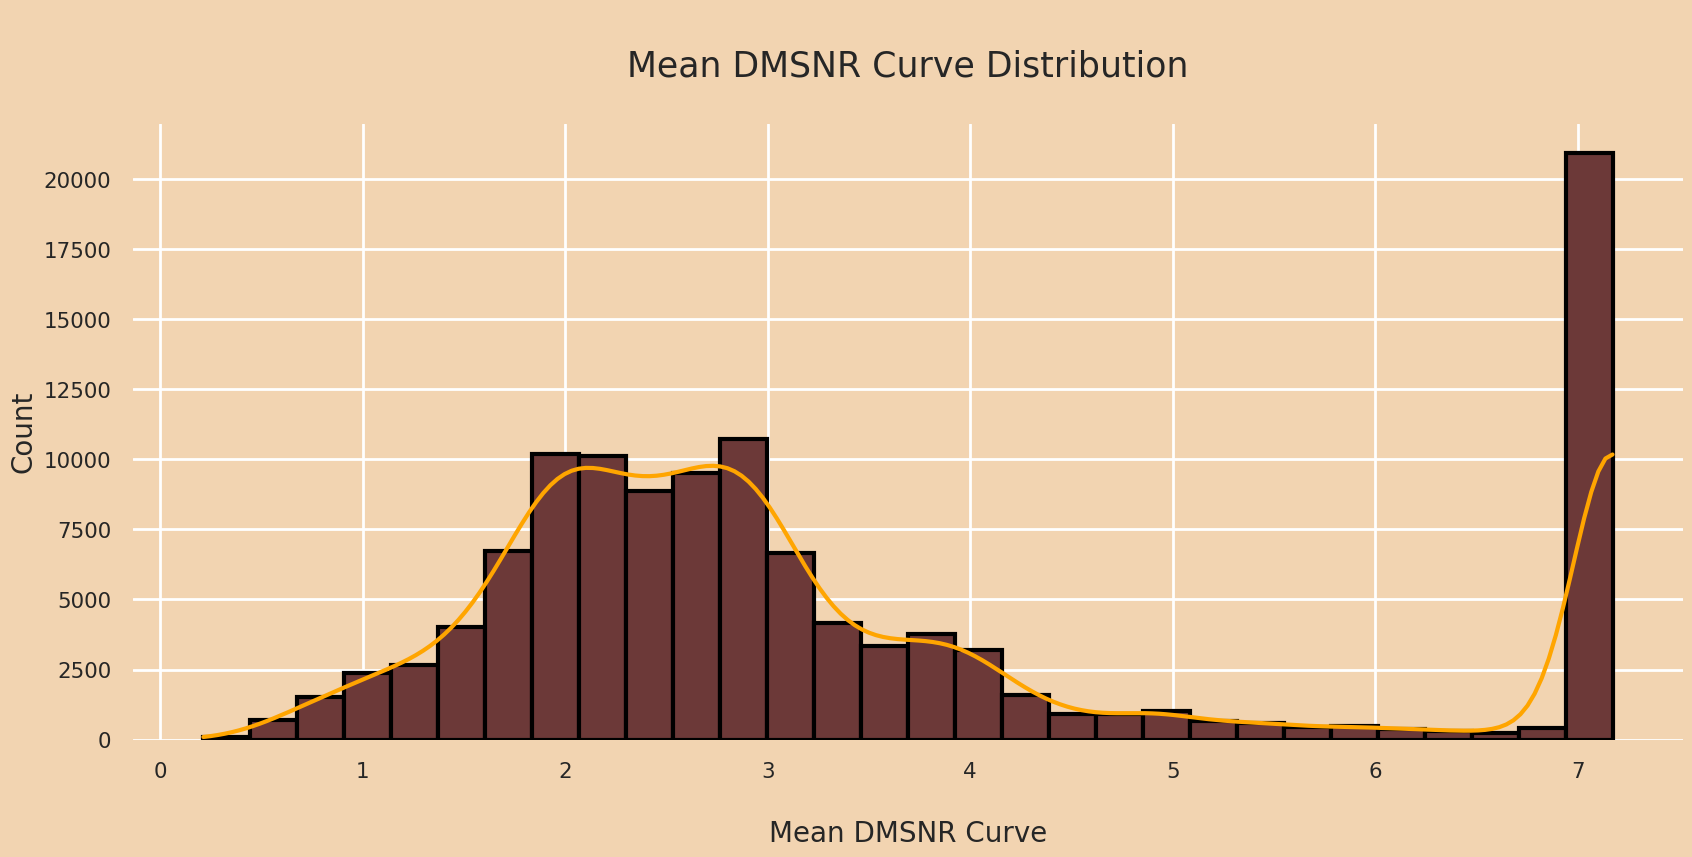

In [69]:
print(f"Let's have a look on the distribution of Mean DMSNR Curve :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(df_quant["Mean_DMSNR_Curve"],color="#6c3938",kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nMean DMSNR Curve Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nMean DMSNR Curve",fontsize=20)
# plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the distribution of SD DMSNR Curve :


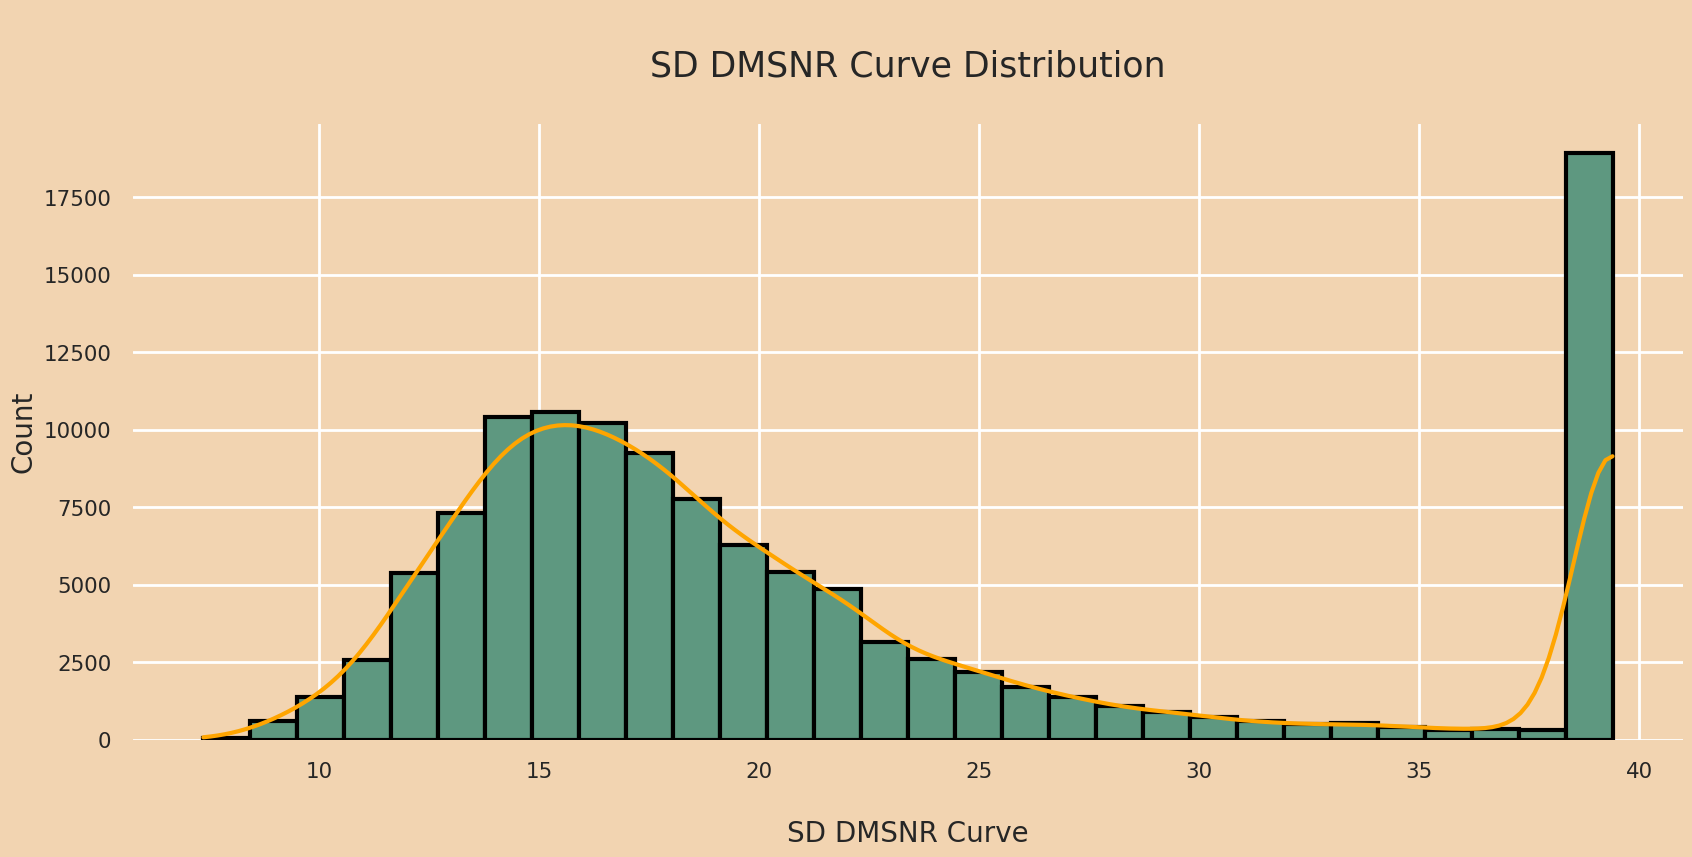

In [73]:
print(f"Let's have a look on the distribution of SD DMSNR Curve :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(df_quant["SD_DMSNR_Curve"],color="#5e9880",kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nSD DMSNR Curve Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nSD DMSNR Curve",fontsize=20)
# plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the distribution of EK DMSNR Curve: 


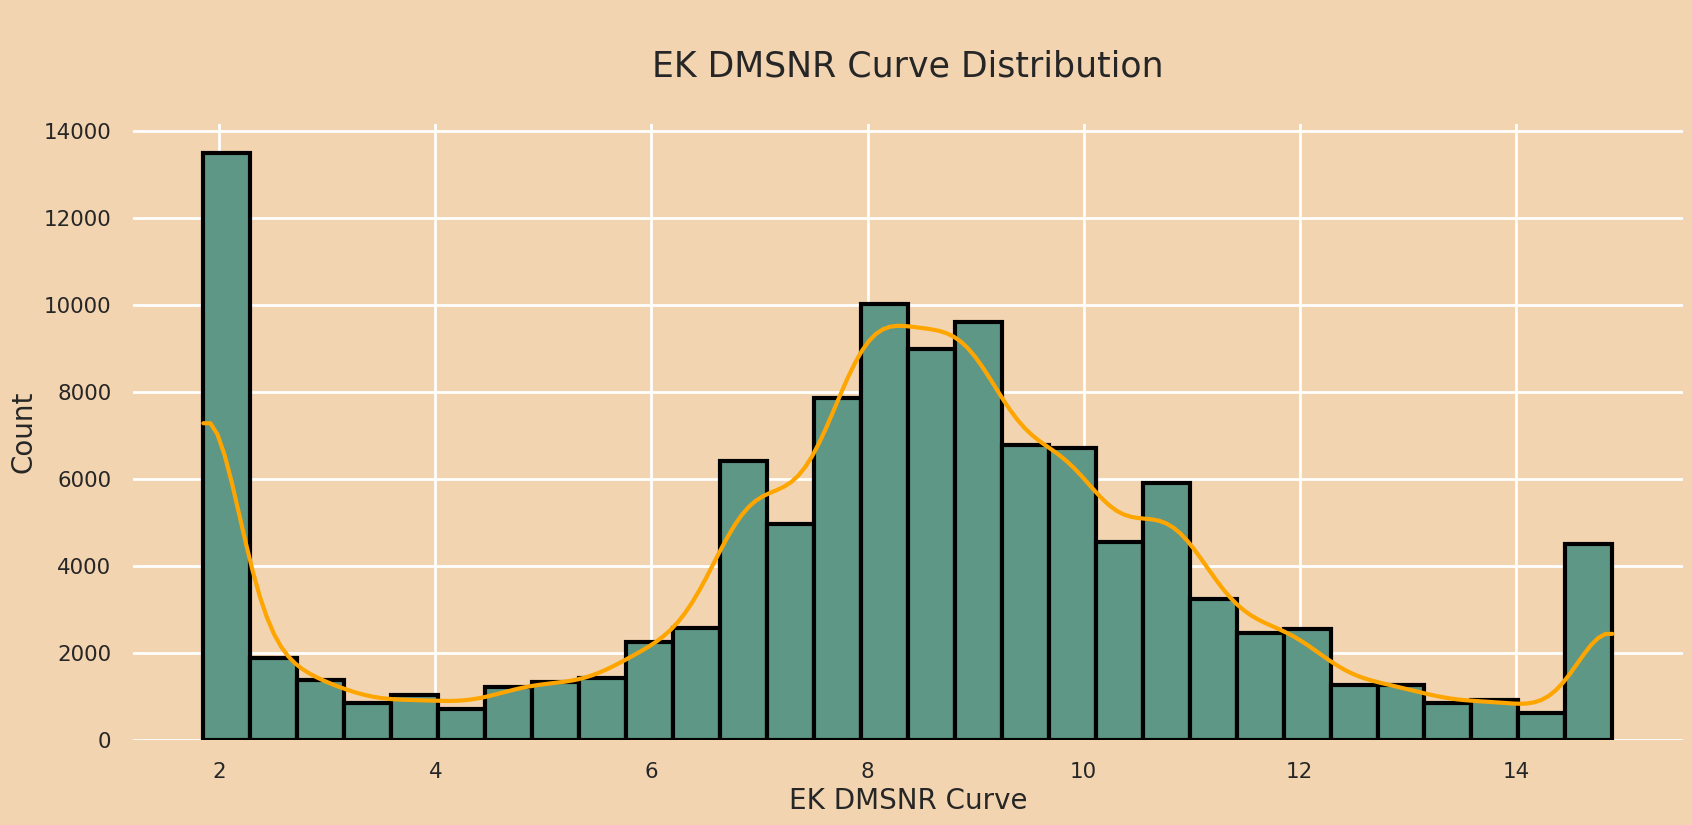

In [74]:
print(f"Let's have a look on the distribution of EK DMSNR Curve: ")
plt.subplots(figsize=(20, 8))
p = sns.histplot(df_quant["EK_DMSNR_Curve"],color=palette[6],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nEK DMSNR Curve Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("EK DMSNR Curve",fontsize=20)
plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the distribution of Skewness DMSNR Curve :


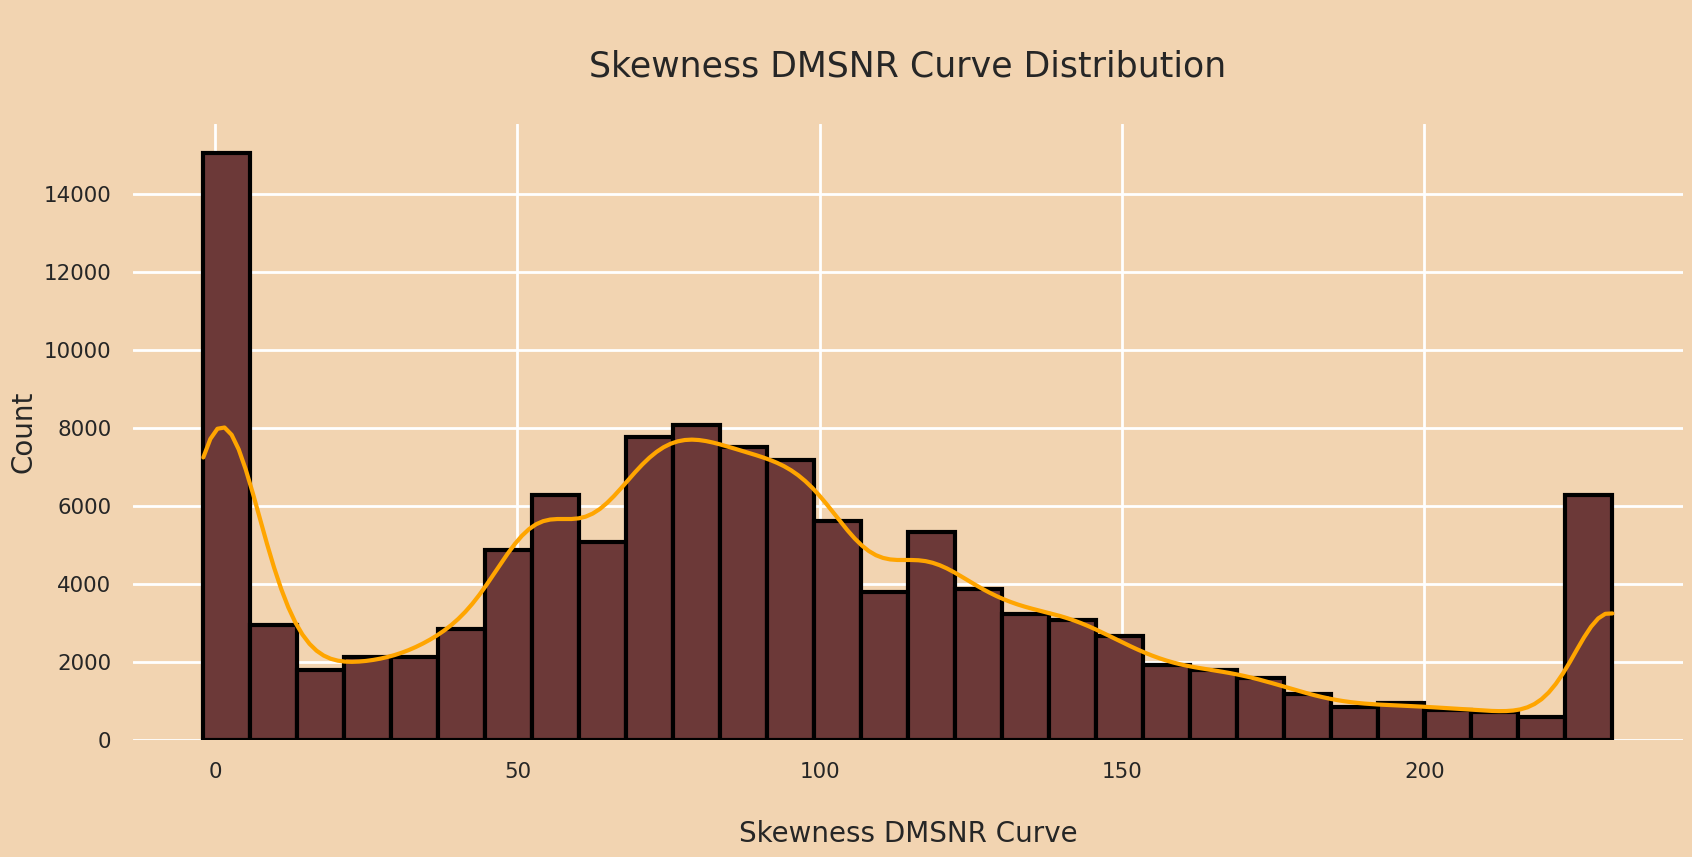

In [75]:
print(f"Let's have a look on the distribution of Skewness DMSNR Curve :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(df_quant["Skewness_DMSNR_Curve"],color="#6c3938",kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nSkewness DMSNR Curve Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nSkewness DMSNR Curve",fontsize=20)
# plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

## Bivariate Distribution

In [94]:
training_df = pd.concat([df_quant, df_qual], axis = 1)
training_df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
id,,,,,,,,,
0,133.172,59.716,0.043,-0.703,7.172,39.397,1.852,-0.650,0
1,87.094,36.258,0.435,2.012,3.417,21.865,7.039,52.686,0
2,112.641,39.818,0.380,0.922,2.731,15.690,8.193,85.650,0
3,120.680,45.918,-0.098,0.012,2.696,20.955,8.184,70.333,0
4,134.070,57.720,-0.108,-0.573,1.108,11.255,14.894,231.120,0


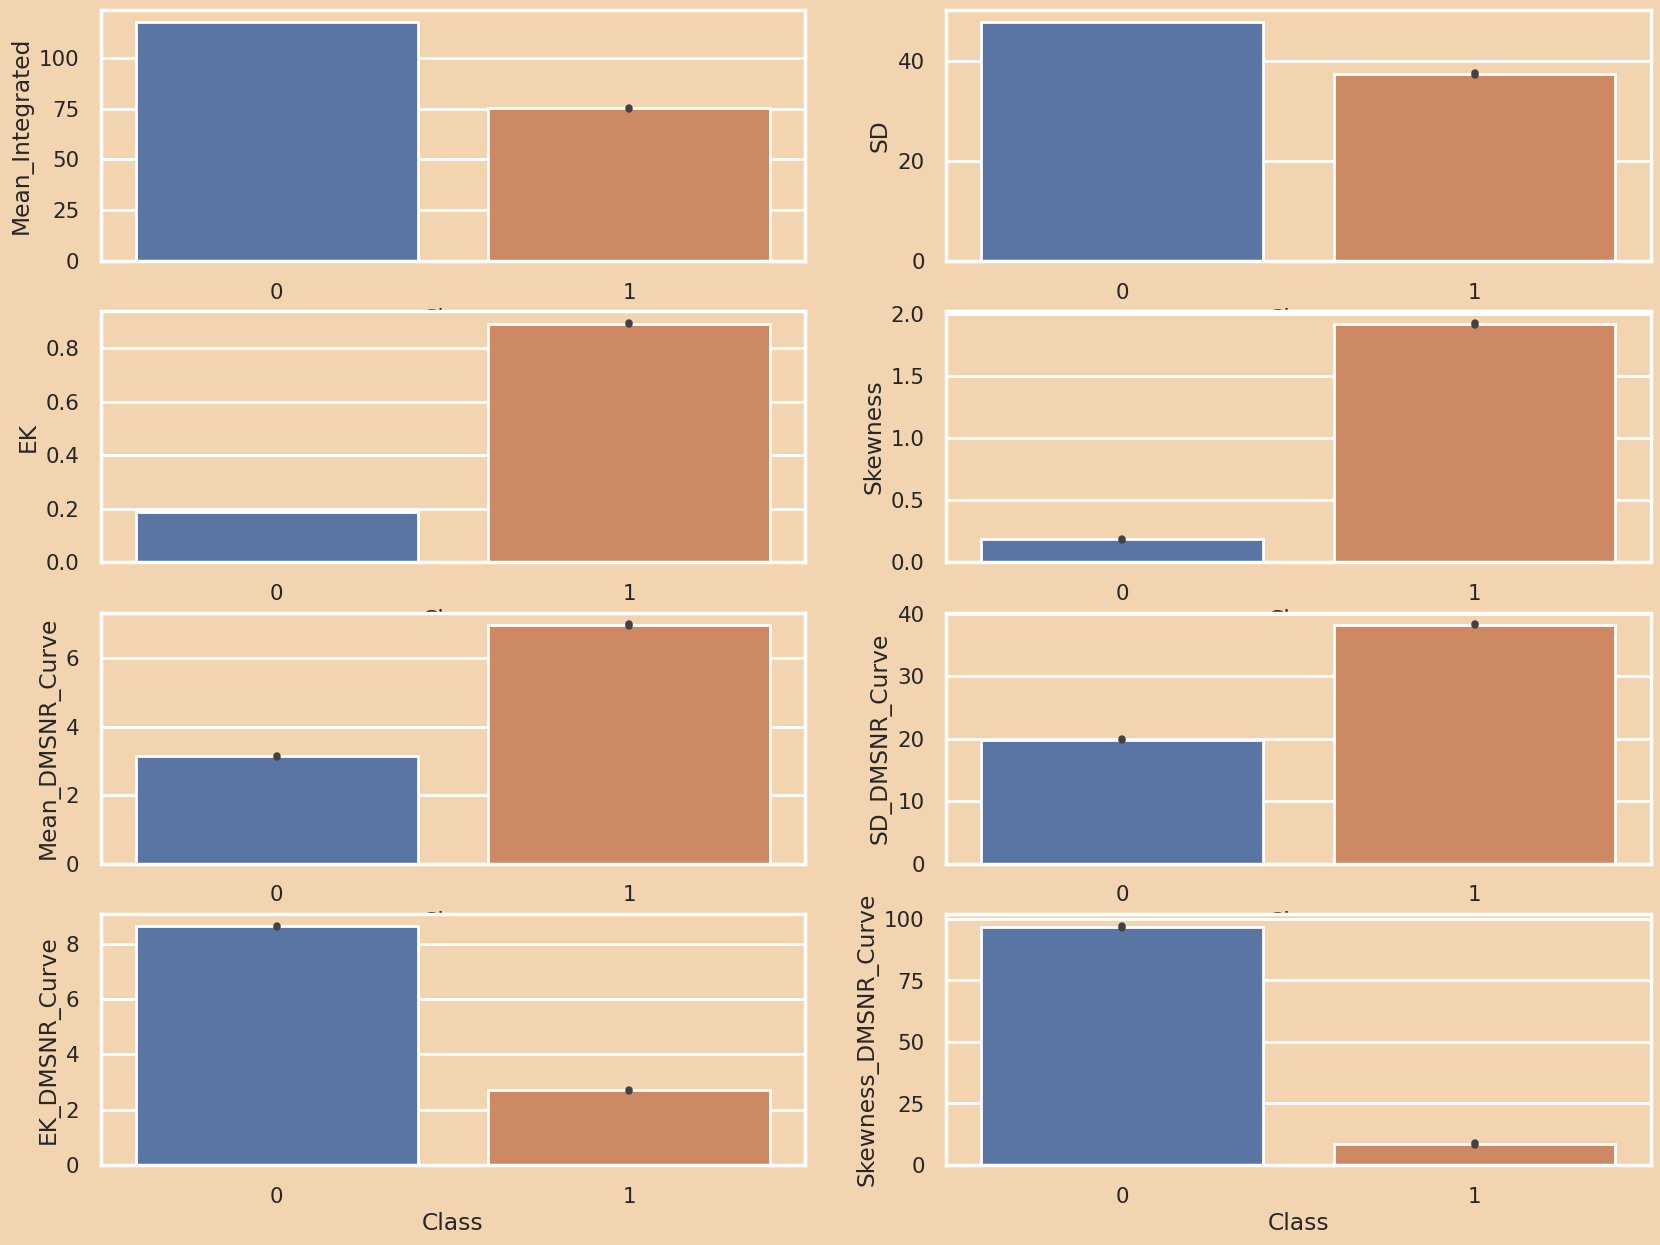

In [95]:
plt.figure(figsize = (20, 15))
for i in range(8):
    plt.subplot(4,2,i+1)
    tr_d = training_df
    col = tr_d.iloc[:,i]
    sns.barplot(data=training_df, x='Class', y=col)
plt.show()

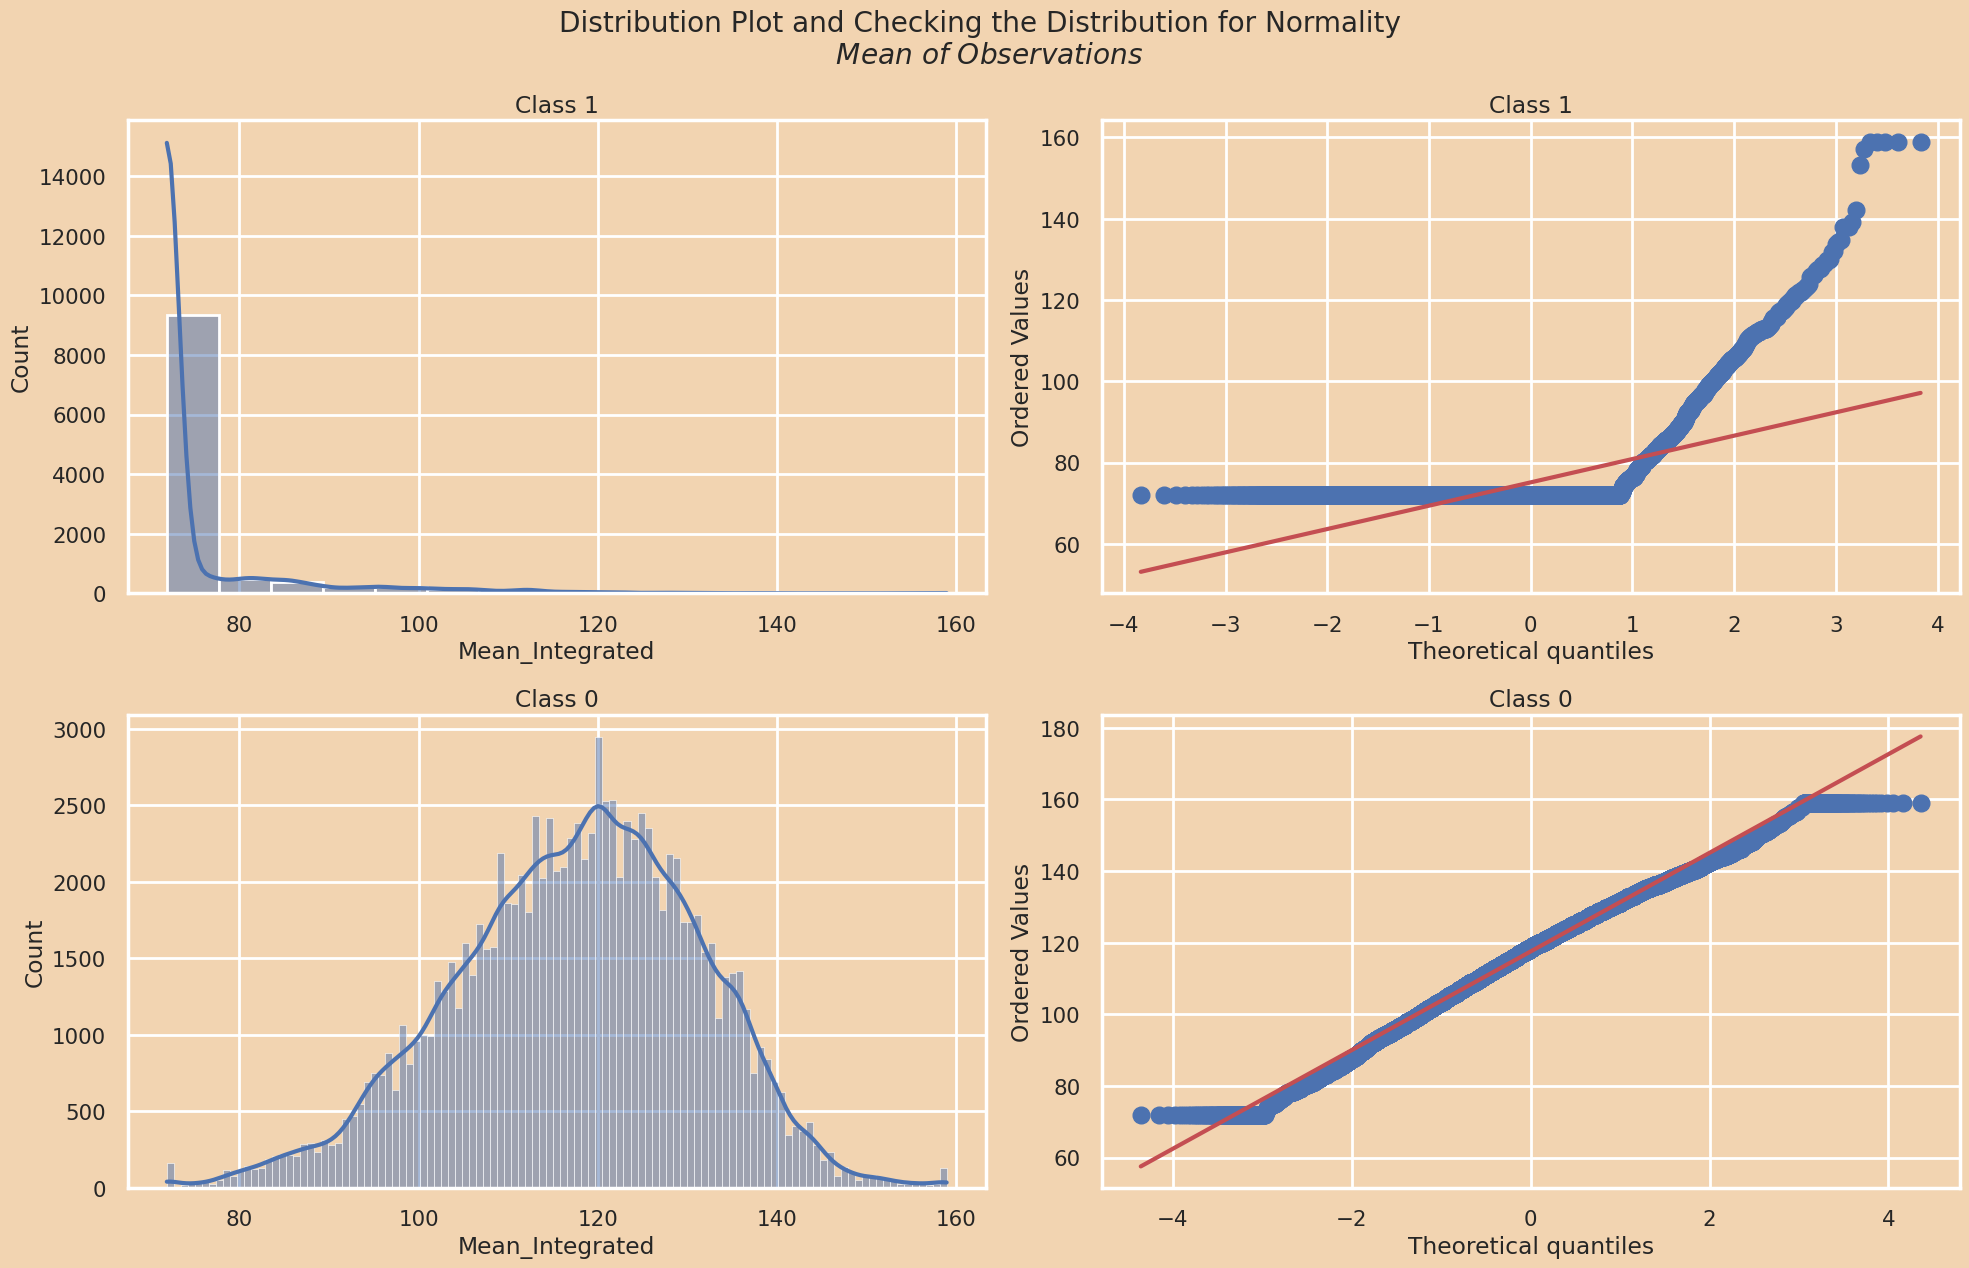

In [96]:
plt.figure(figsize = (20, 13))
plt.subplot(2,2,1)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==1,'Mean_Integrated'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(training_df.loc[training_df['Class']==1, 'Mean_Integrated'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==0,'Mean_Integrated'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(training_df.loc[training_df['Class']==0,'Mean_Integrated'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Mean$ $of$ $Observations$')
plt.tight_layout()
plt.show()

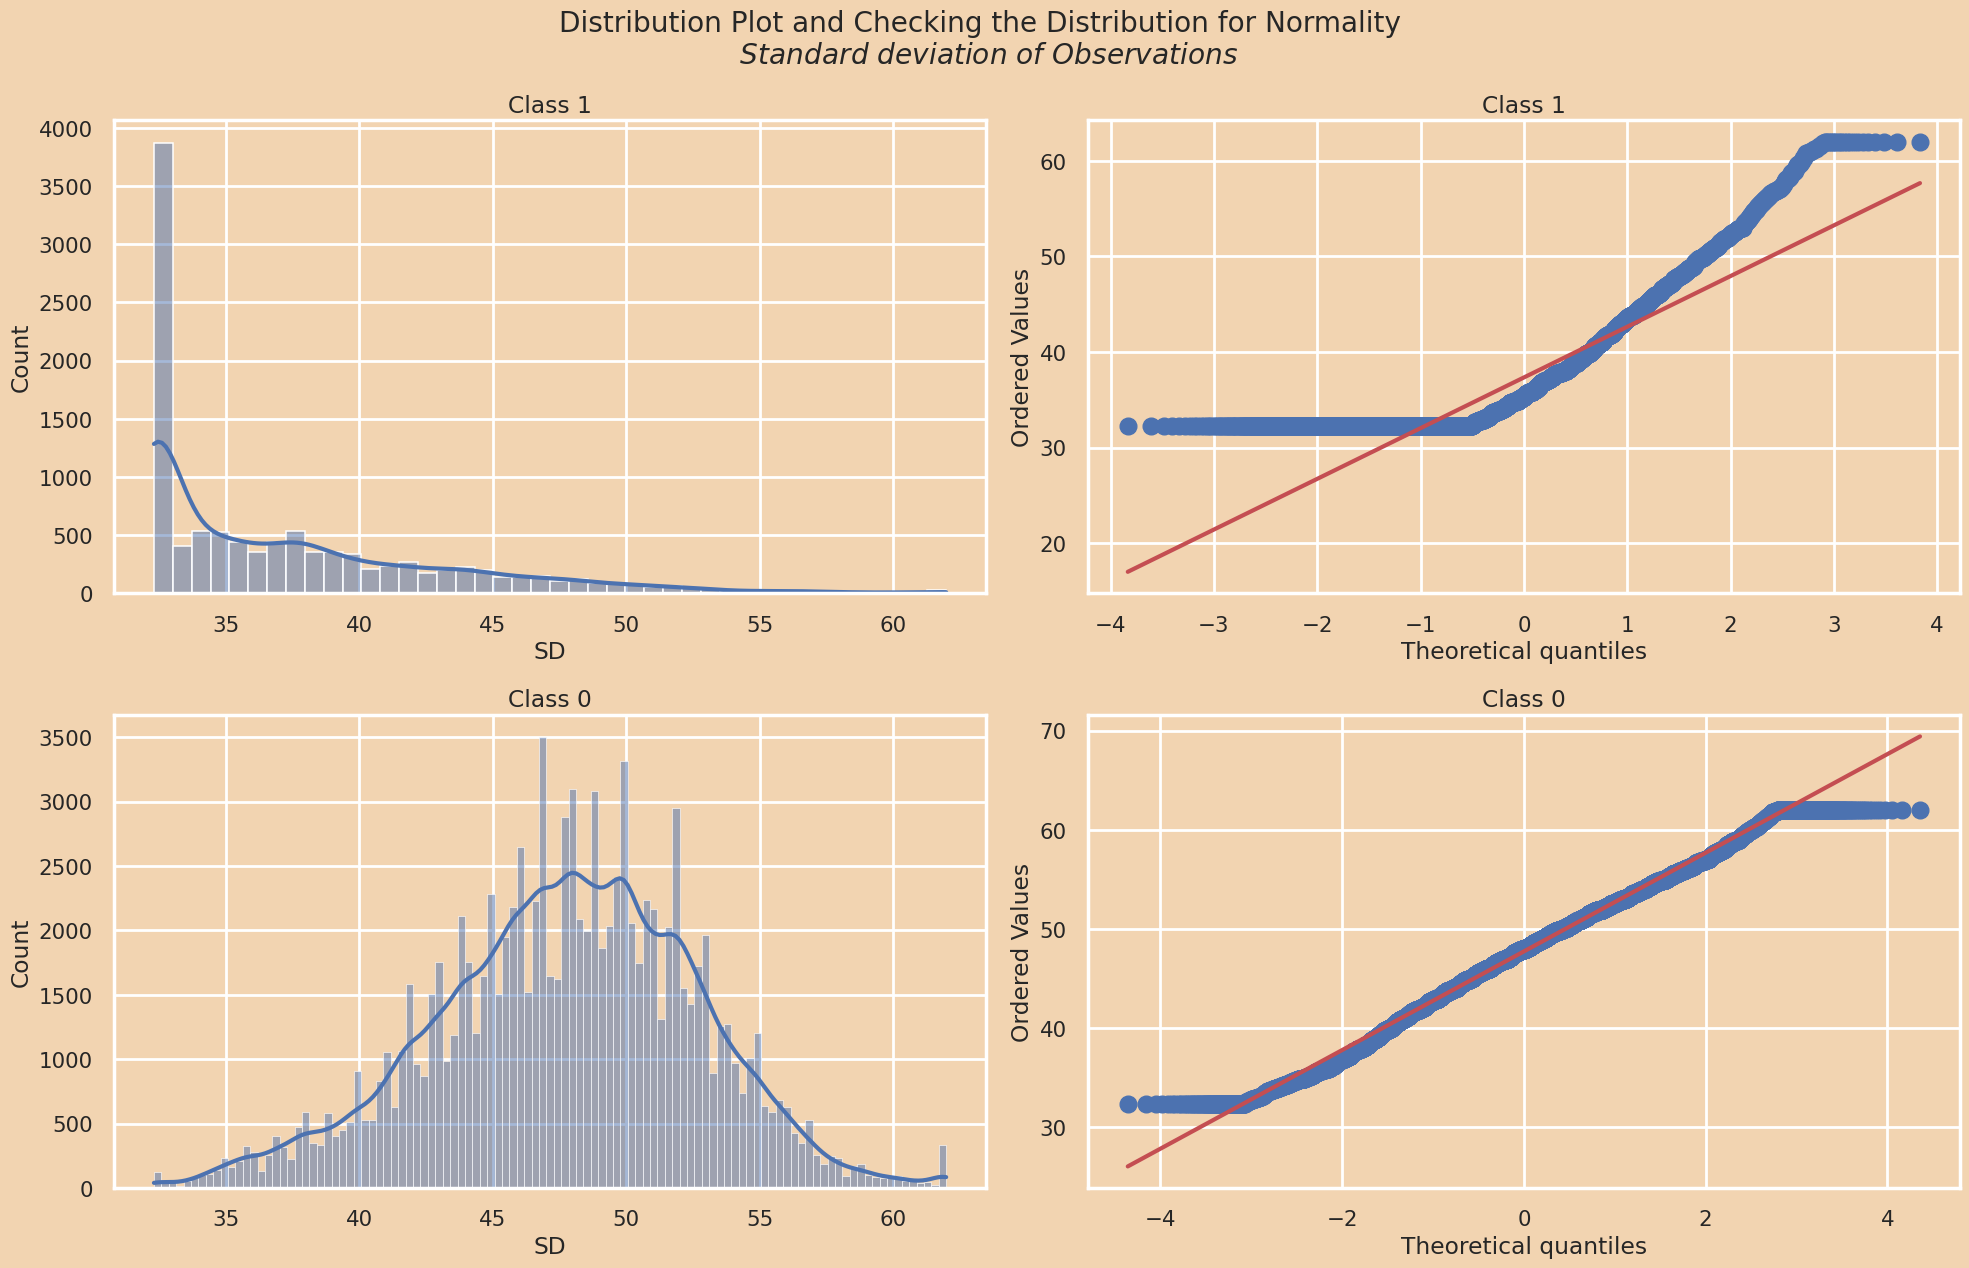

In [97]:
plt.figure(figsize = (20, 13))
plt.subplot(2,2,1)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==1,'SD'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(training_df.loc[training_df['Class']==1, 'SD'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==0,'SD'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(training_df.loc[training_df['Class']==0,'SD'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Standard$ $deviation$ $of$ $Observations$')
plt.tight_layout()
plt.show()

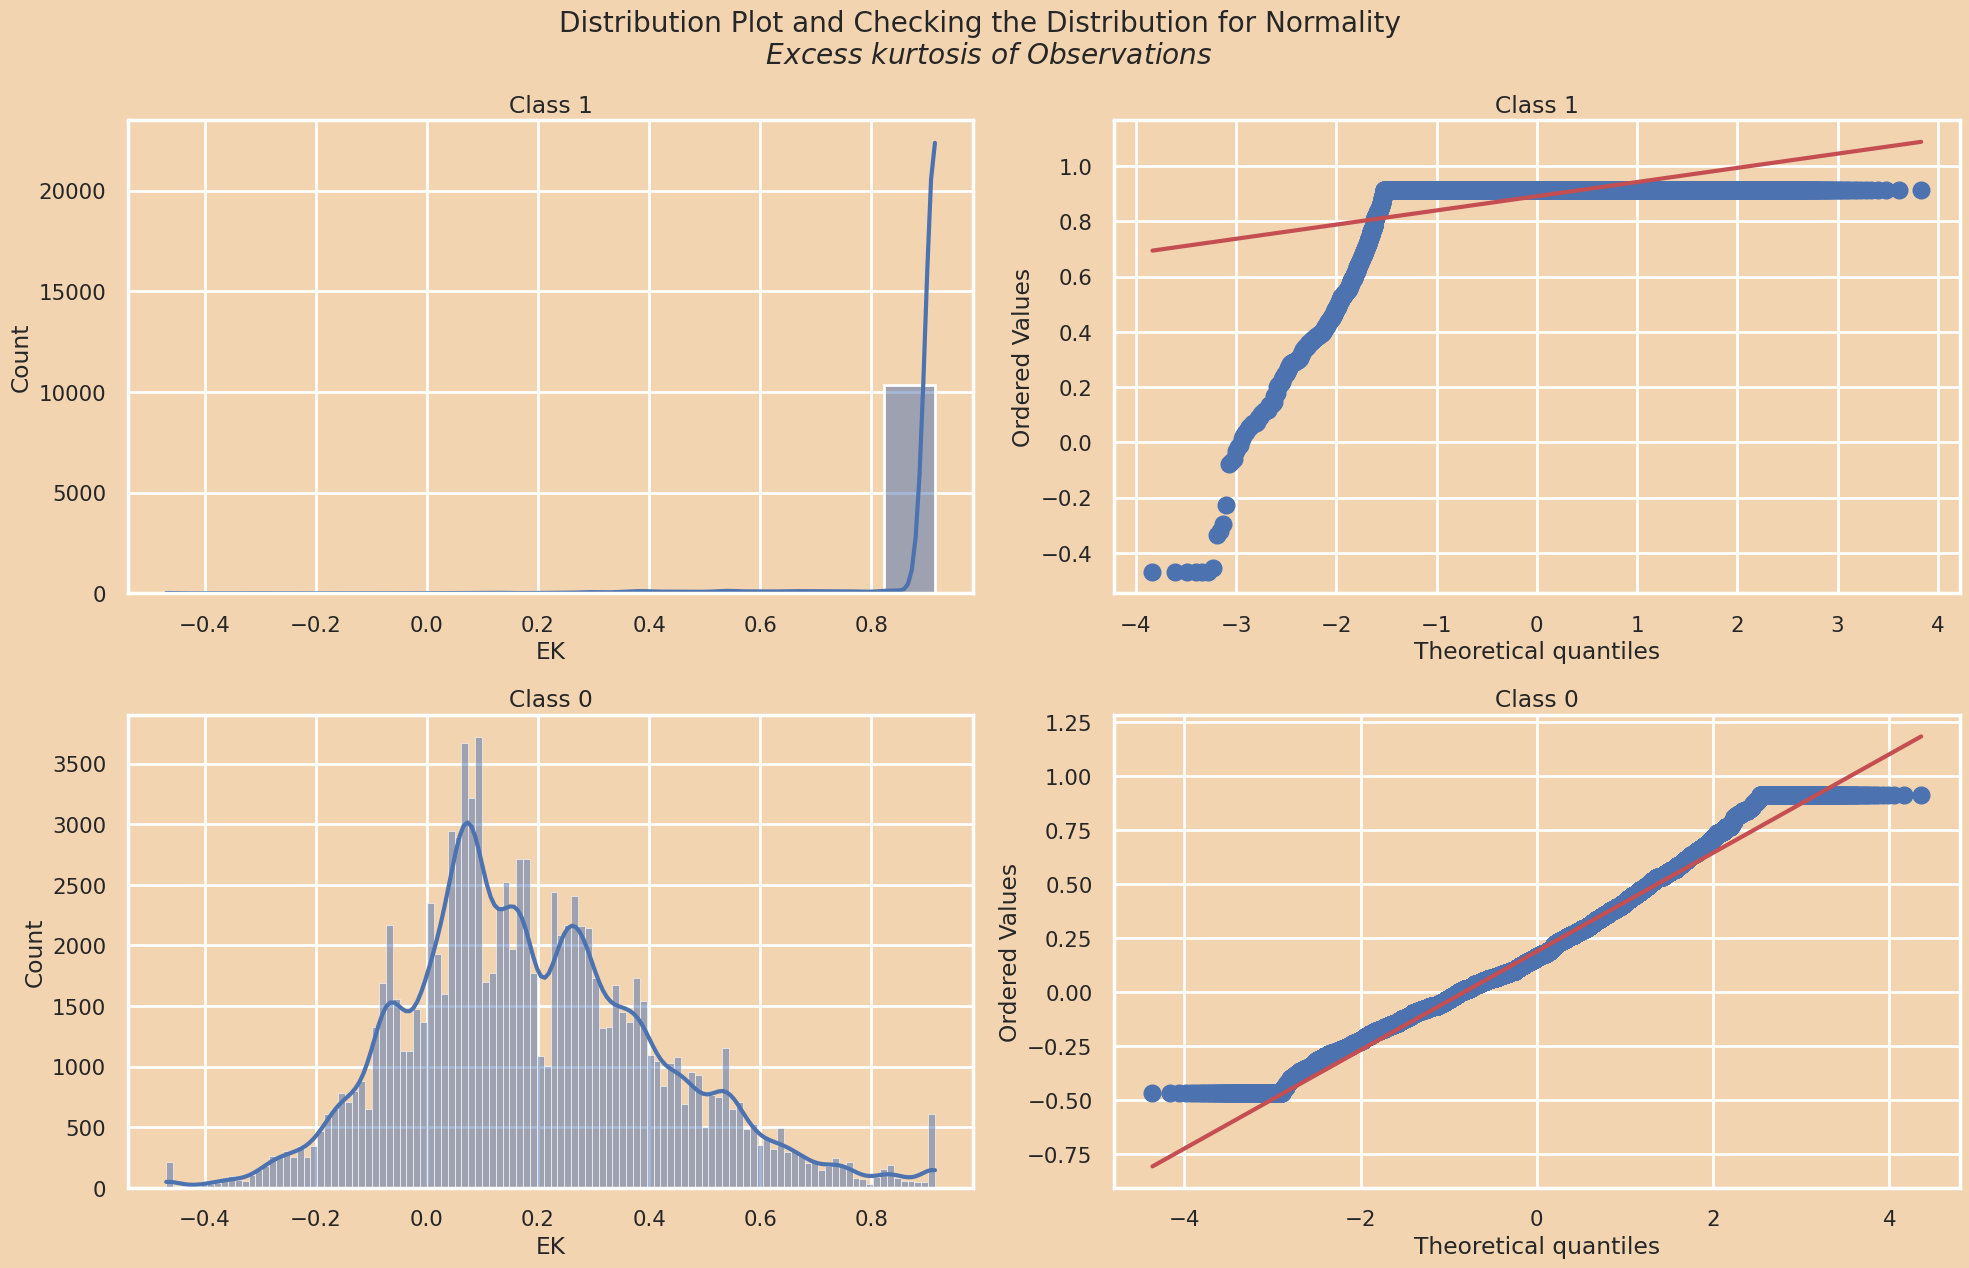

In [99]:
plt.figure(figsize = (20, 13))
plt.subplot(2,2,1)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==1,'EK'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(training_df.loc[training_df['Class']==1, 'EK'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==0,'EK'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(training_df.loc[training_df['Class']==0,'EK'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Excess$ $kurtosis$ $of$ $Observations$')
plt.tight_layout()
plt.show()

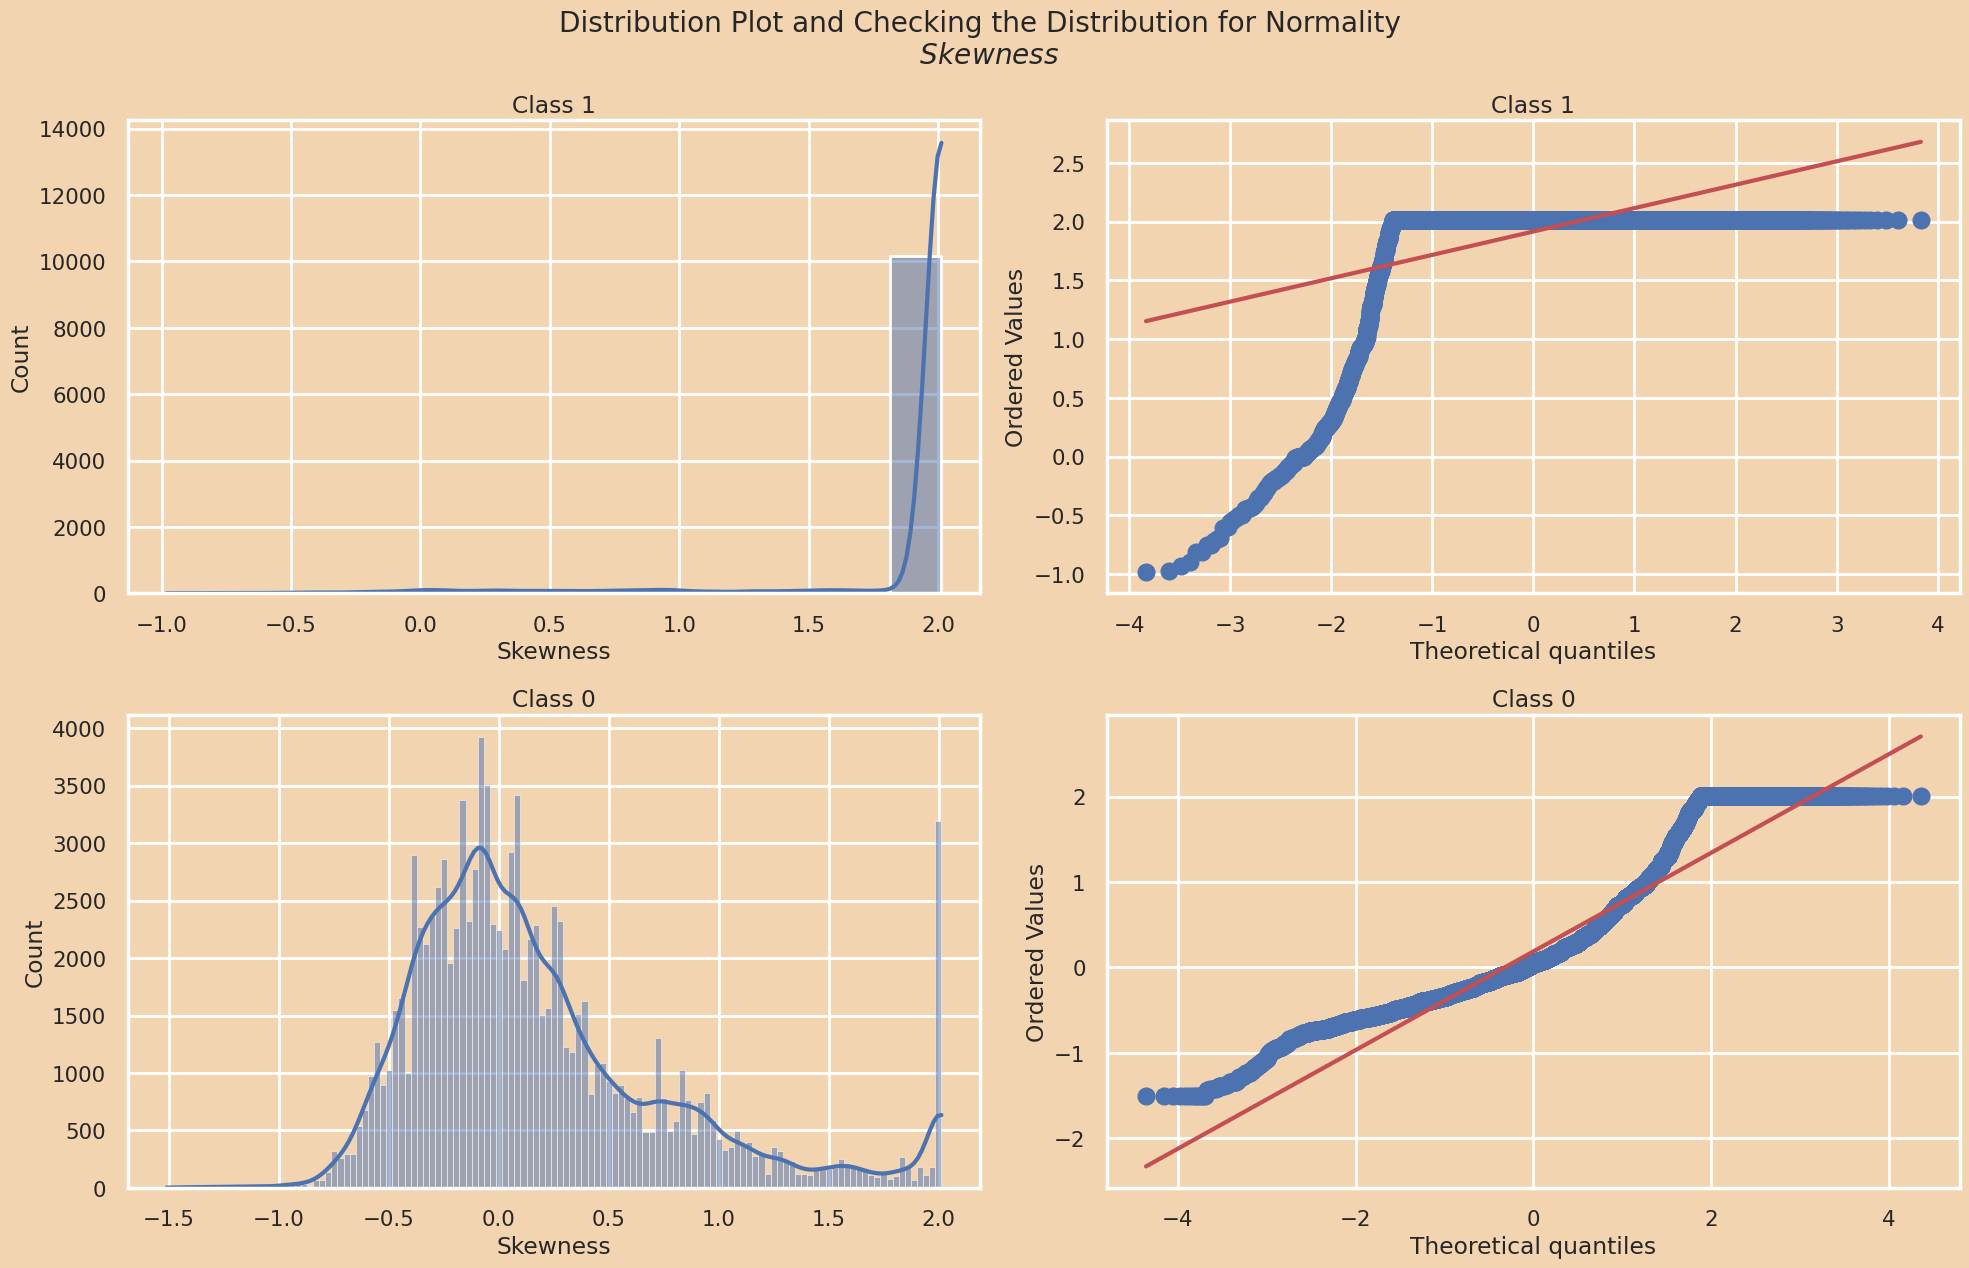

In [100]:
plt.figure(figsize = (20, 13))
plt.subplot(2,2,1)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==1,'Skewness'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(training_df.loc[training_df['Class']==1, 'Skewness'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==0,'Skewness'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(training_df.loc[training_df['Class']==0,'Skewness'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Skewness$')
plt.tight_layout()
plt.show()

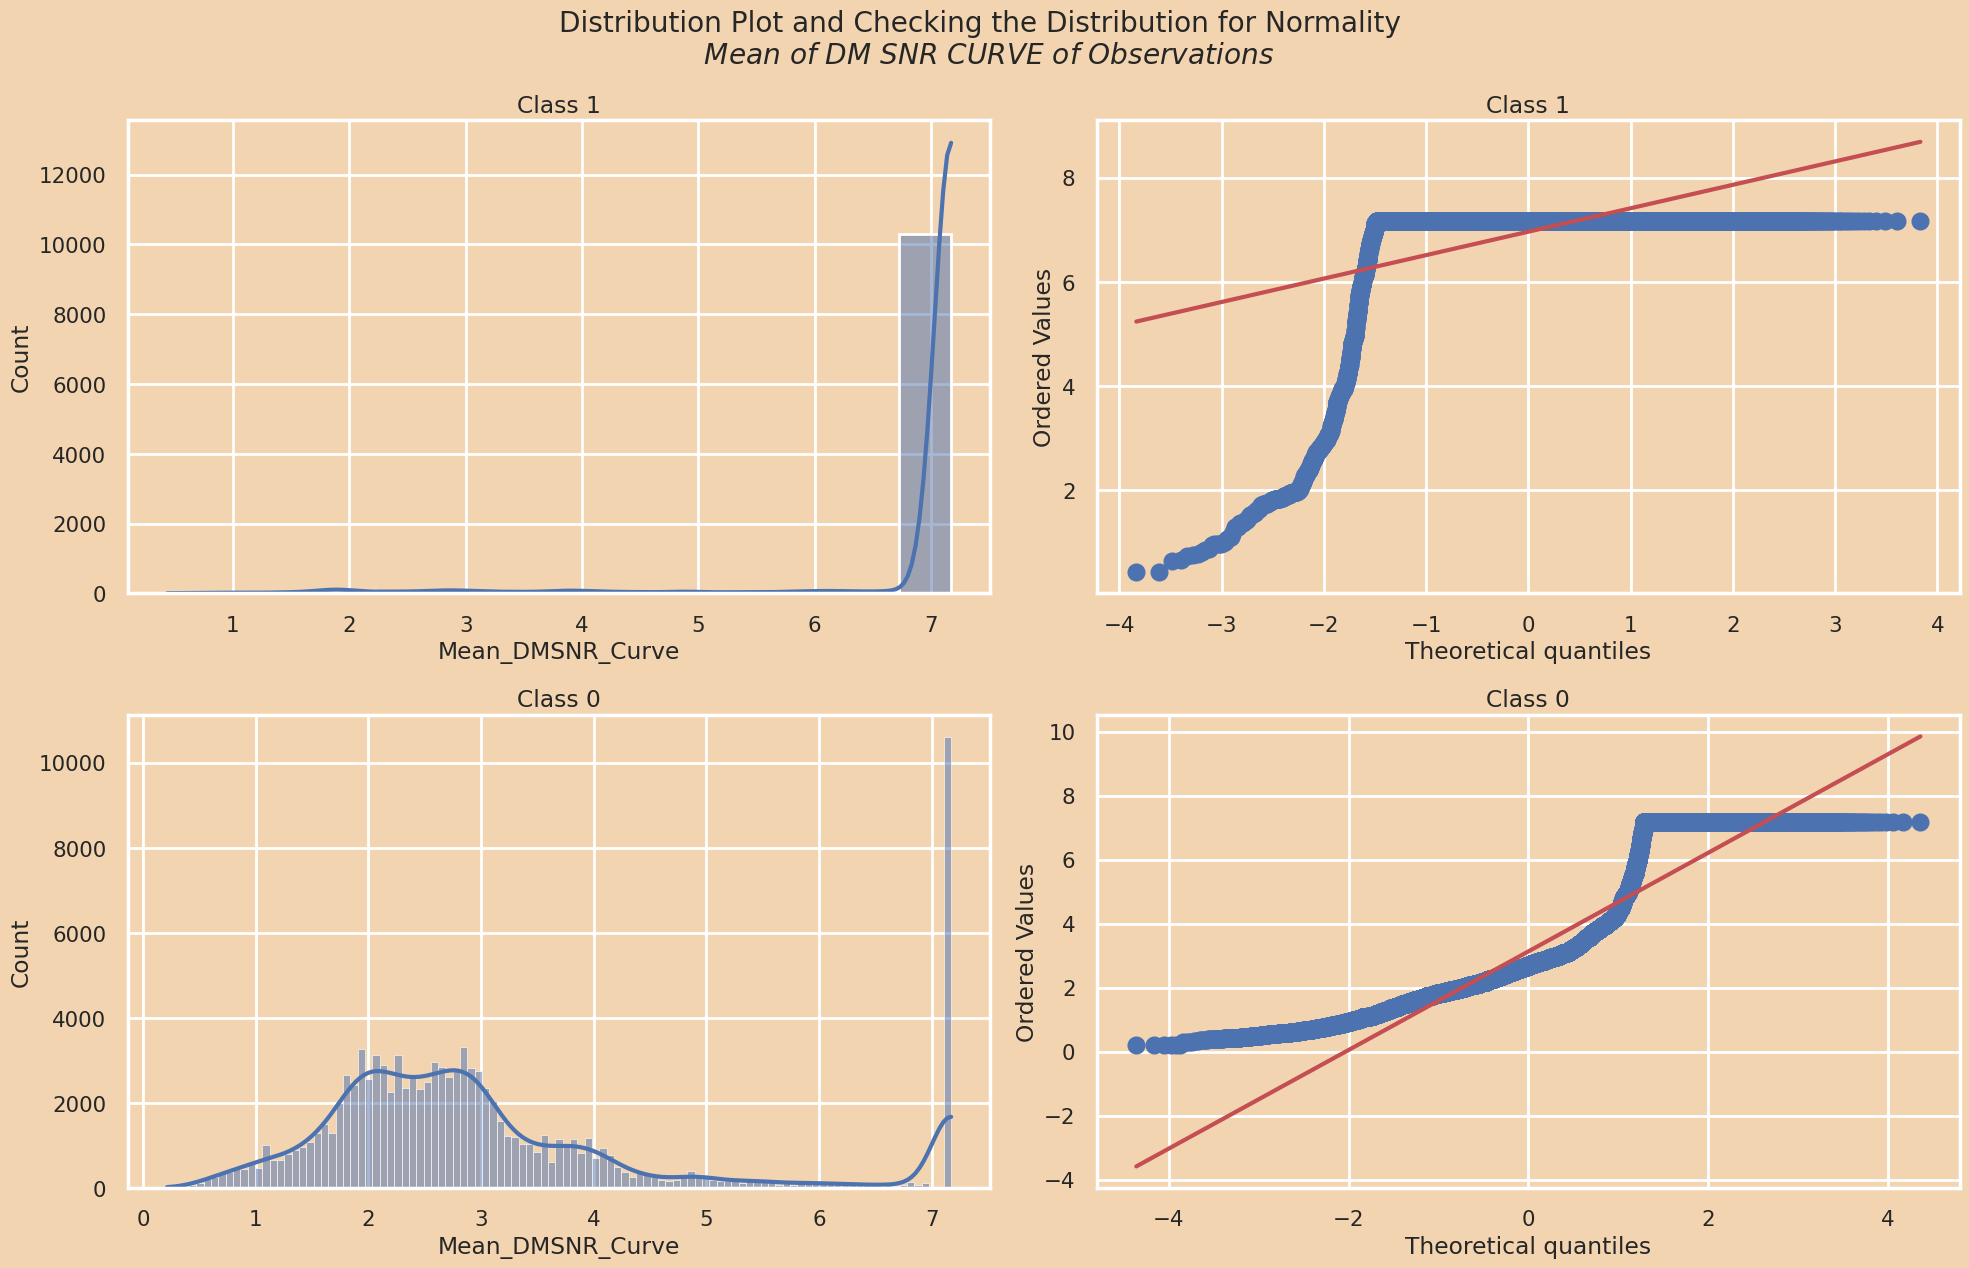

In [102]:
plt.figure(figsize = (20, 13))
plt.subplot(2,2,1)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==1,'Mean_DMSNR_Curve'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(training_df.loc[training_df['Class']==1, 'Mean_DMSNR_Curve'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==0,'Mean_DMSNR_Curve'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(training_df.loc[training_df['Class']==0,'Mean_DMSNR_Curve'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Mean$ $of$ $DM$ $SNR$ $CURVE$ $of$ $Observations$')
plt.tight_layout()
plt.show()

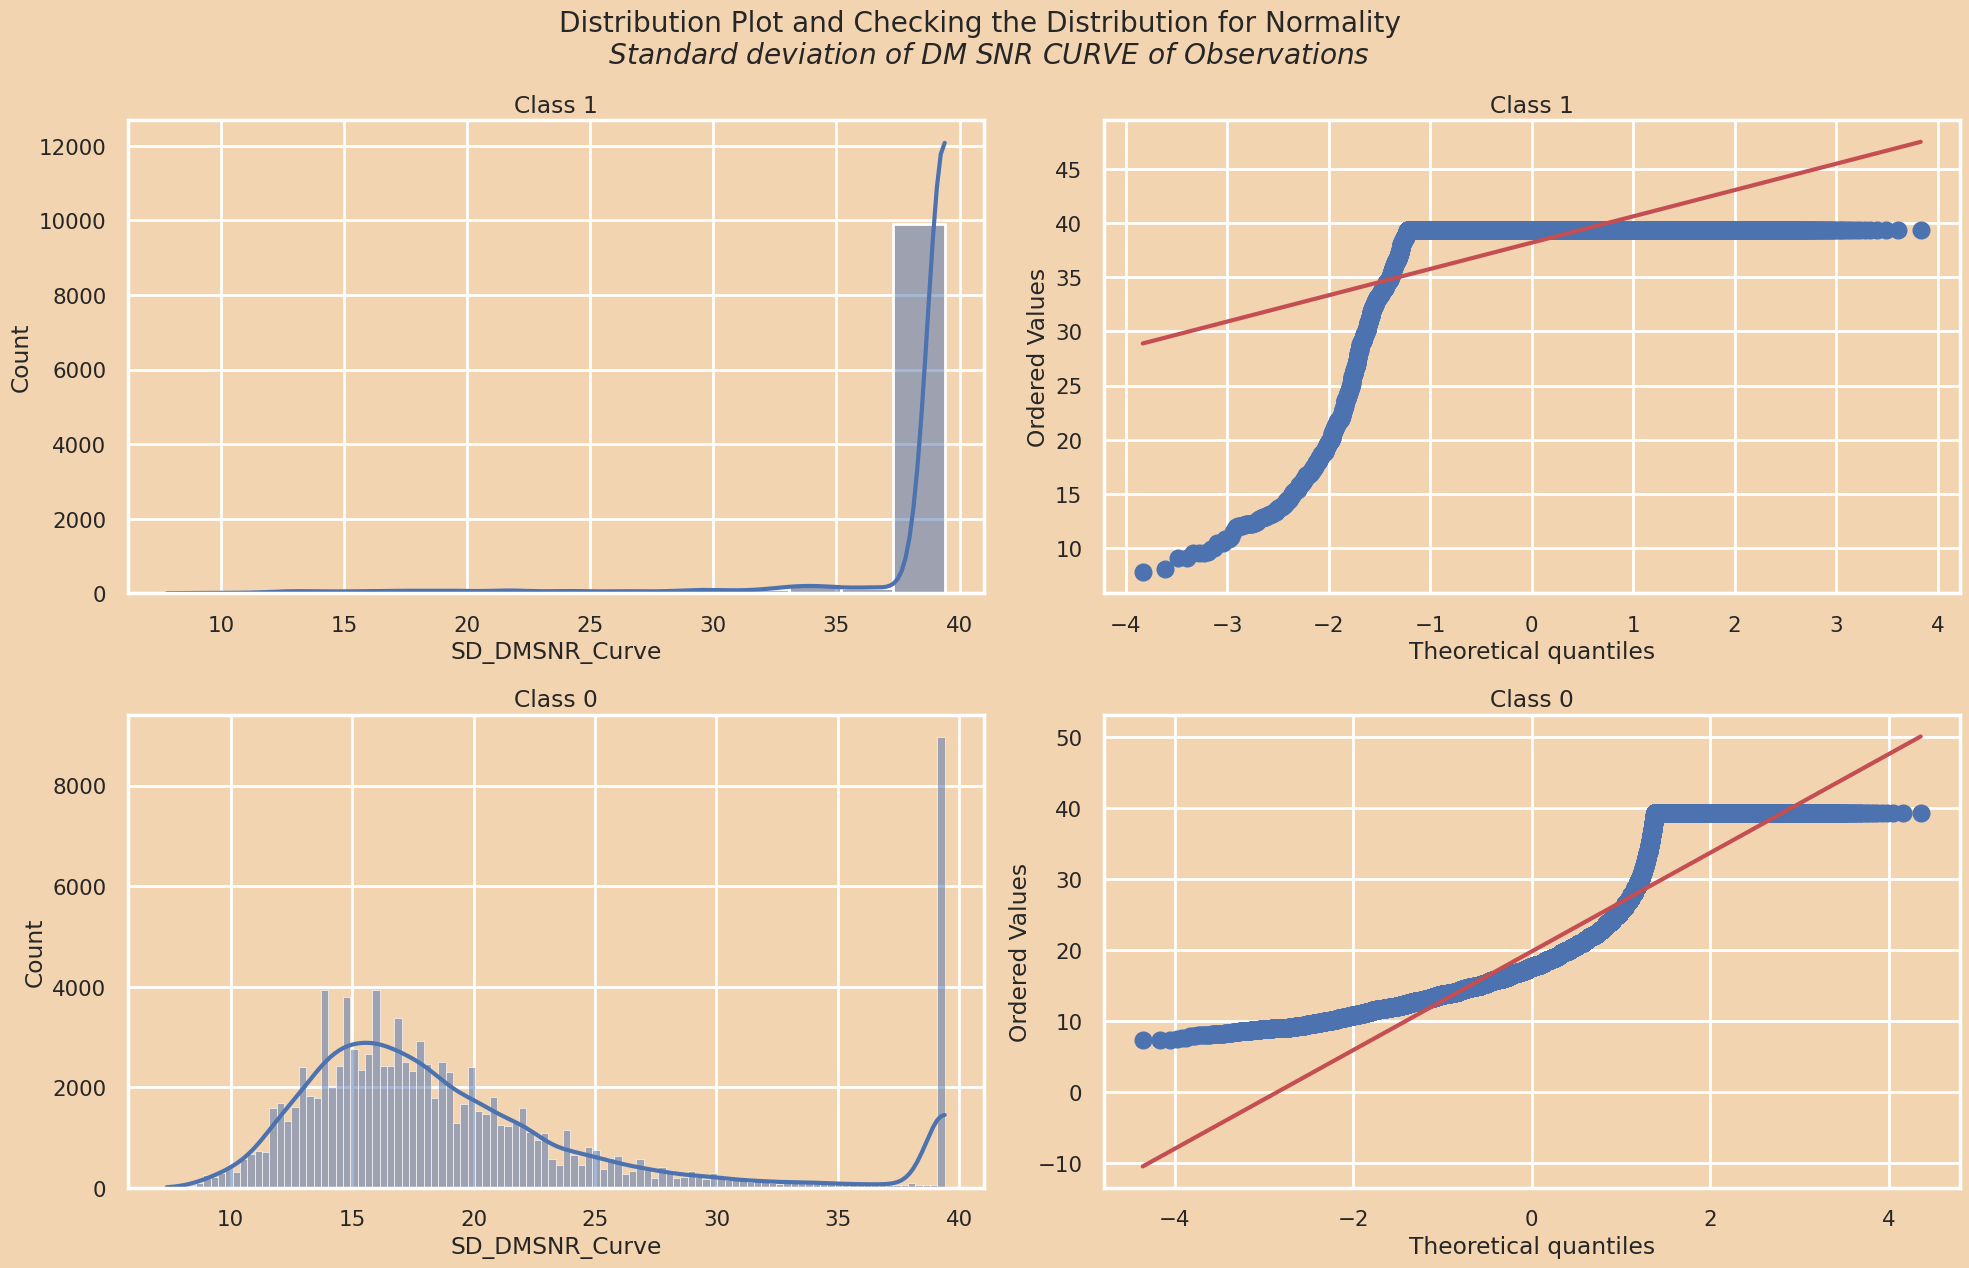

In [104]:
plt.figure(figsize = (20, 13))
plt.subplot(2,2,1)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==1,'SD_DMSNR_Curve'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(training_df.loc[training_df['Class']==1, 'SD_DMSNR_Curve'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==0,'SD_DMSNR_Curve'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(training_df.loc[training_df['Class']==0,'SD_DMSNR_Curve'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Standard$ $deviation$ $of$ $DM$ $SNR$ $CURVE$ $of$ $Observations$')
plt.tight_layout()
plt.show()

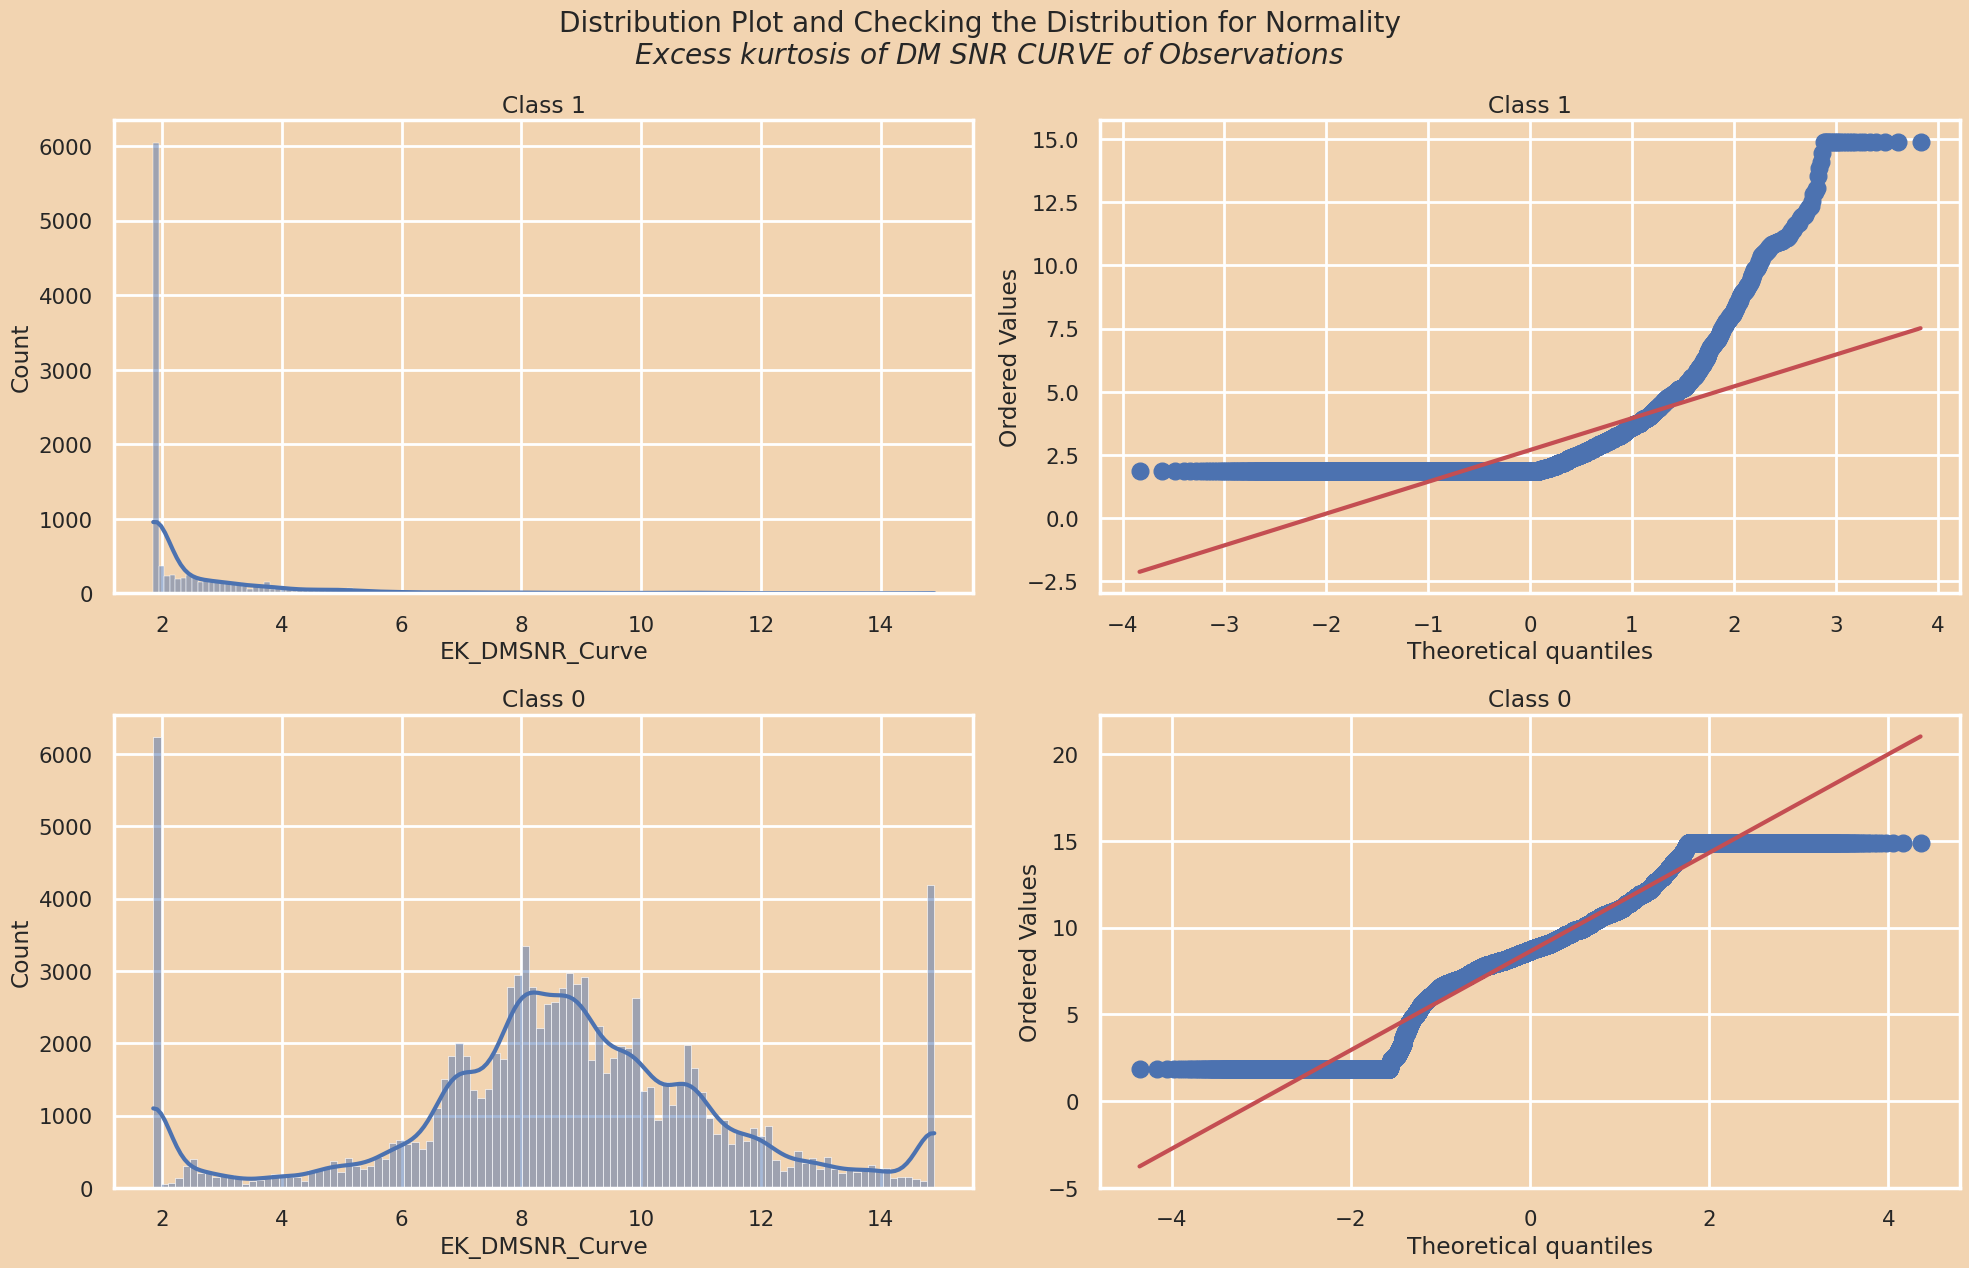

In [105]:
plt.figure(figsize = (20, 13))
plt.subplot(2,2,1)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==1,'EK_DMSNR_Curve'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(training_df.loc[training_df['Class']==1, 'EK_DMSNR_Curve'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==0,'EK_DMSNR_Curve'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(training_df.loc[training_df['Class']==0,'EK_DMSNR_Curve'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Excess$ $kurtosis$ $of$ $DM$ $SNR$ $CURVE$ $of$ $Observations$')
plt.tight_layout()
plt.show()

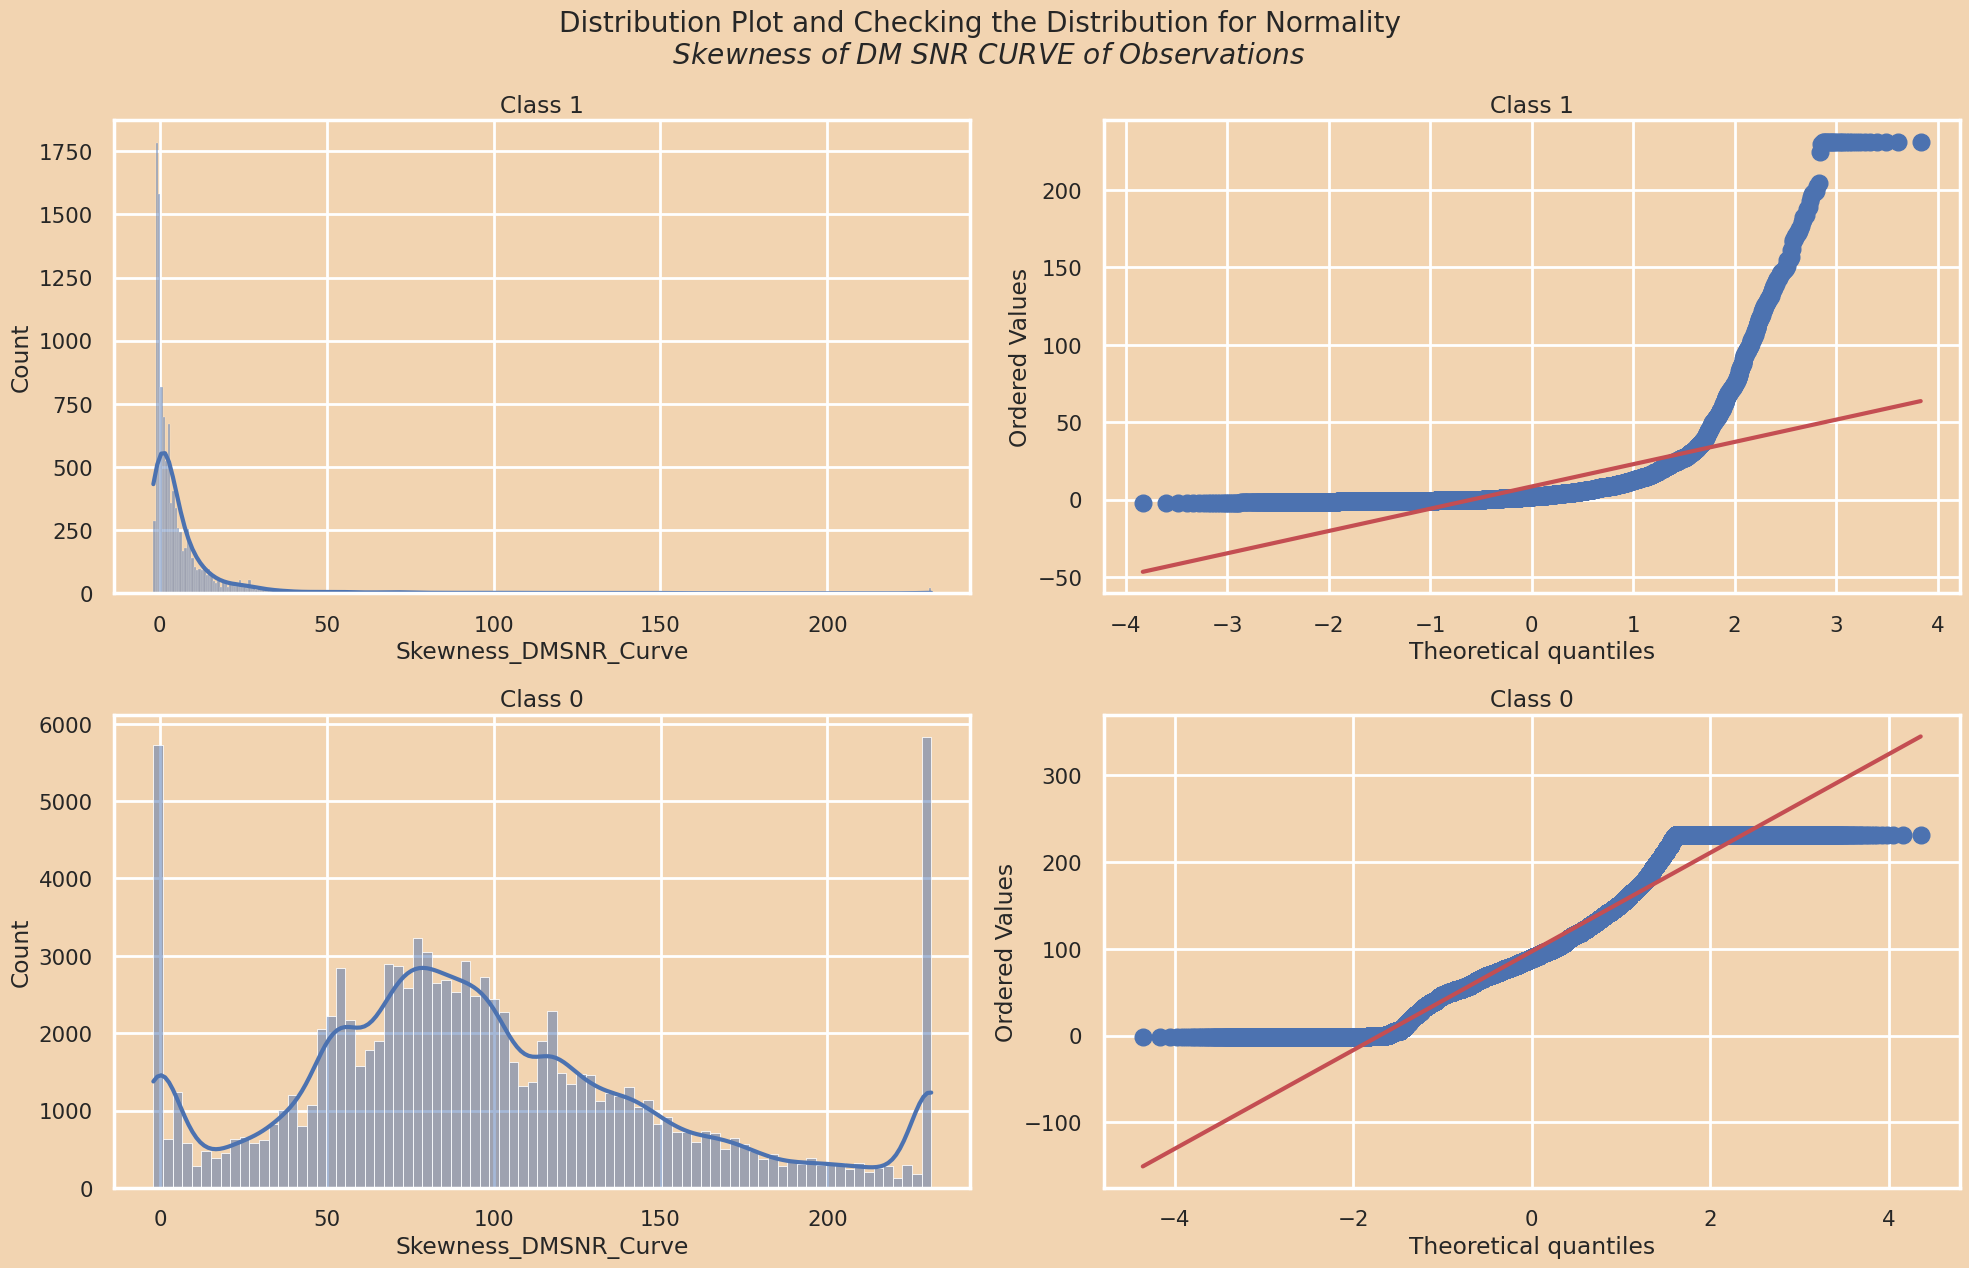

In [106]:
plt.figure(figsize = (20, 13))
plt.subplot(2,2,1)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==1,'Skewness_DMSNR_Curve'], kde=True)
plt.title('Class 1')
plt.subplot(2,2,2)
st.probplot(training_df.loc[training_df['Class']==1, 'Skewness_DMSNR_Curve'], plot=plt)
plt.title('Class 1')
plt.subplot(2,2,3)
sns.histplot(data=training_df, x=training_df.loc[training_df['Class']==0,'Skewness_DMSNR_Curve'], kde=True)
plt.title('Class 0')
plt.subplot(2,2,4)
st.probplot(training_df.loc[training_df['Class']==0,'Skewness_DMSNR_Curve'], plot=plt)
plt.title('Class 0')
plt.suptitle('Distribution Plot and Checking the Distribution for Normality \n $Skewness$ $of$ $DM$ $SNR$ $CURVE$ $of$ $Observations$')
plt.tight_layout()
plt.show()